In [26]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Covid-19 daily data for all states from the Covid Tracking Project
url = "https://covidtracking.com//api/v1/states/daily.csv"
data = pd.read_csv(url, sep=",")
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

#data = data.rename(columns={'hospitalizedIncrease': 'NewlyHospitalized', 'deathIncrease': 'NewDeath', 
#                     'positiveIncrease': 'NewPositive'})
data = data.sort_values(['state', 'date'], ascending = (True, True))
cur_state_data=data.loc[data['state'] == 'MA', ["date","positiveIncrease","hospitalizedIncrease",
                                                'deathIncrease']].copy()
cur_state_data['avgNewPosstive'] = cur_state_data.iloc[:,1].rolling(window=7).mean()
cur_state_data['avgNewlyHospitalized'] = cur_state_data.iloc[:,2].rolling(window=7).mean()
cur_state_data['avgNewDeath'] = cur_state_data.iloc[:,3].rolling(window=7).mean()
cur_state_data.info()
cur_state_data.head(15)
# get the list of states reported
#state_list = data.state.unique()

# go over all states to generate line plots
#plt.rcParams.update({'figure.max_open_warning': 0})

#for name in state_list:
    #cur_state_data = data.loc[data['state'] == name, ["date", "NewlyHospitalized","NewDeath", "NewPositive" ]].copy()
    #cur_state_data = cur_state_data.set_index('date')
#    plot_title = "Daily Covid-19 New Cases by State - " + name
#    fig, ax = plt.subplots(figsize=(12, 4))
#    ax.set(xlabel ="Date", ylabel="Number of Cases", title = plot_title)
#   plt.xticks(rotation=15)  
#    ax.legend(['NewlyHospitalized', 'NewDeath'])
#    sns.lineplot(x="date", y="NewlyHospitalized", data = cur_state_data, ax=ax)
#    sns.lineplot(x="date", y="NewDeath", data = cur_state_data, ax=ax)
#    plt.show() 
#    fig, ax = plt.subplots(figsize=(12, 4))
#    plt.xticks(rotation=15)
#    ax.legend(['NewPositive'])
#    sns.lineplot(x="date", y="NewPositive", data = cur_state_data, ax=ax, legend='full')
#    plt.show()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 7228 to 21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  130 non-null    datetime64[ns]
 1   positiveIncrease      130 non-null    int64         
 2   hospitalizedIncrease  130 non-null    int64         
 3   deathIncrease         130 non-null    int64         
 4   avgNewPosstive        124 non-null    float64       
 5   avgNewlyHospitalized  124 non-null    float64       
 6   avgNewDeath           124 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 8.1 KB


date  positiveIncrease  hospitalizedIncrease  deathIncrease  \
7228 2020-03-12                 0                     0              0   
7177 2020-03-13                15                     0              0   
7126 2020-03-14                15                     0              0   
7075 2020-03-15                26                     0              0   
7021 2020-03-16                33                     0              0   
6965 2020-03-17                21                     0              0   
6909 2020-03-18                38                     0              2   
6853 2020-03-19                73                     0              1   
6797 2020-03-20                85                     0              2   
6741 2020-03-21               112                    61              2   
6685 2020-03-22               121                    10              4   
6629 2020-03-23               131                     8              6   
6573 2020-03-24               382                    15              9   
6517 2020-03-25               679                     9              7   
6461 2020-03-26               579                   116              9   

      avgNewPosstive  avgNewlyHospitalized  avgNewDeath  
7228             NaN                   NaN          NaN  
7177             NaN                   NaN          NaN  
7126             NaN                   NaN          NaN  
7075             NaN                   NaN          NaN  
7021             NaN                   NaN          NaN  
6965             NaN                   NaN          NaN  
6909       21.142857              0.000000     0.285714  
6853       31.571429              0.000000     0.428571  
6797       41.571429              0.000000     0.714286  
6741       55.428571              8.714286     1.000000  
6685       69.000000             10.142857     1.571429  
6629       83.000000             11.285714     2.428571  
6573      134.571429             13.428571     3.714286  
6517      226.142857             14.714286     4.428571  
6461      298.428571             31.285714     5.571429

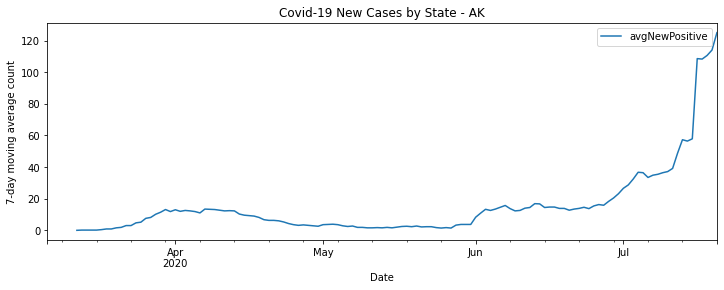

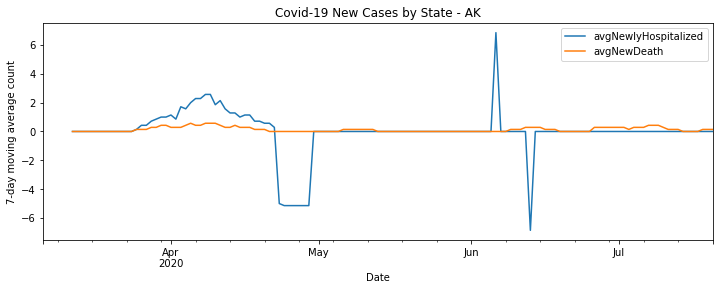

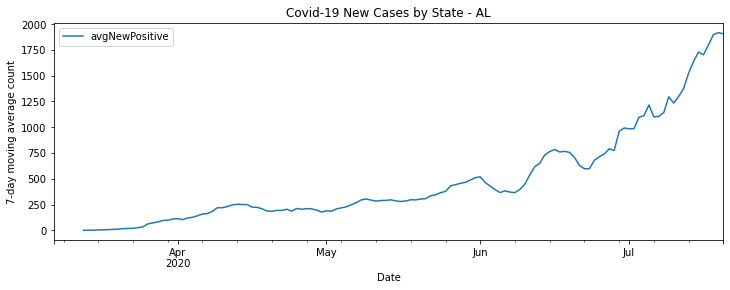

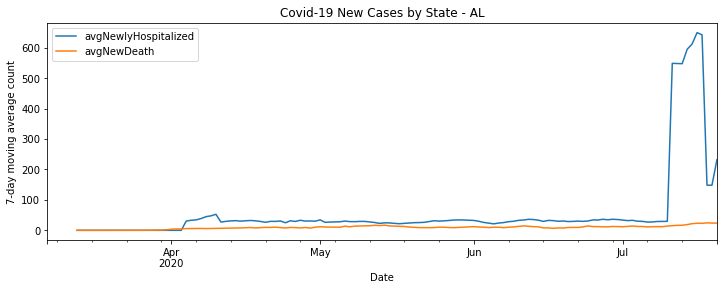

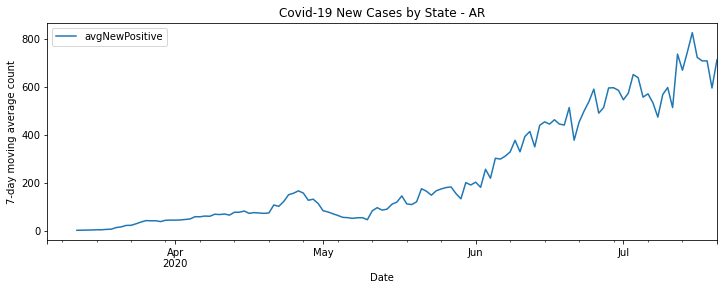

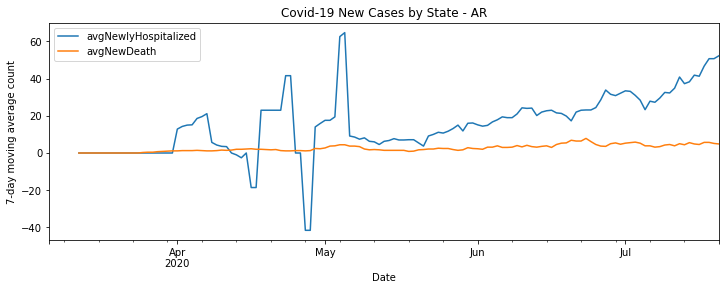

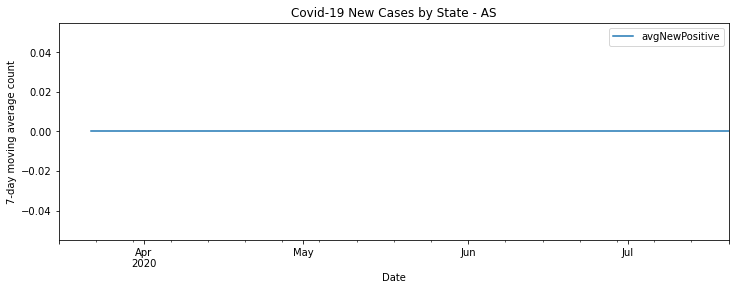

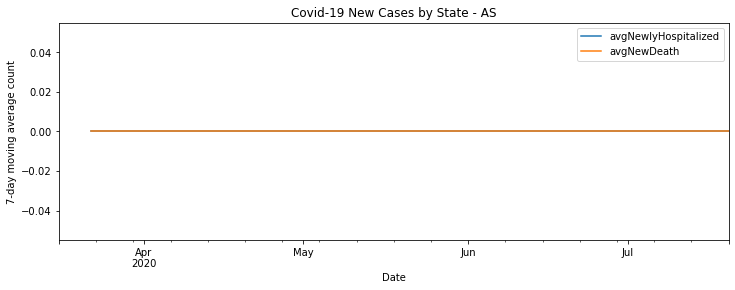

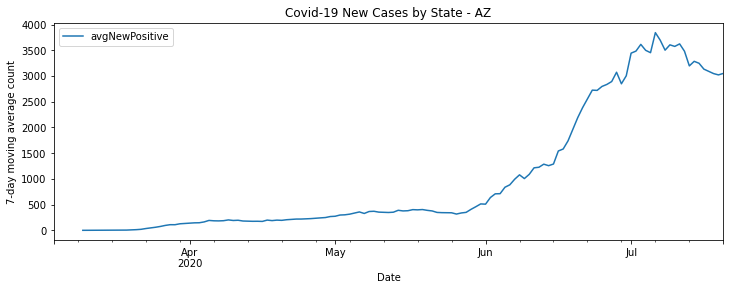

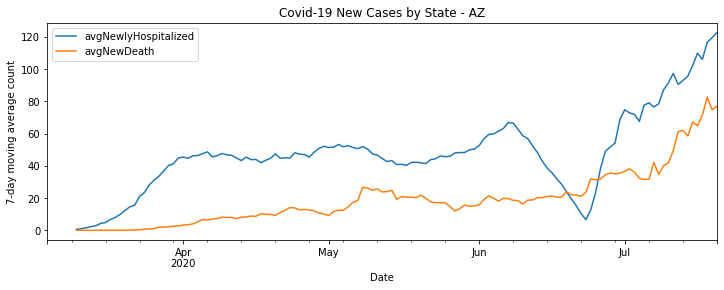

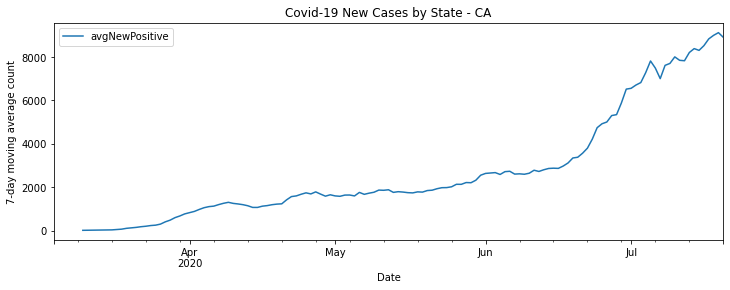

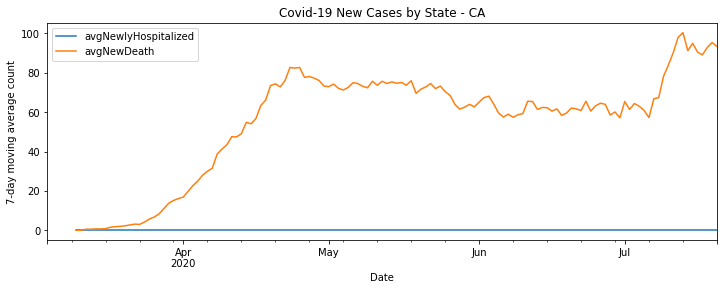

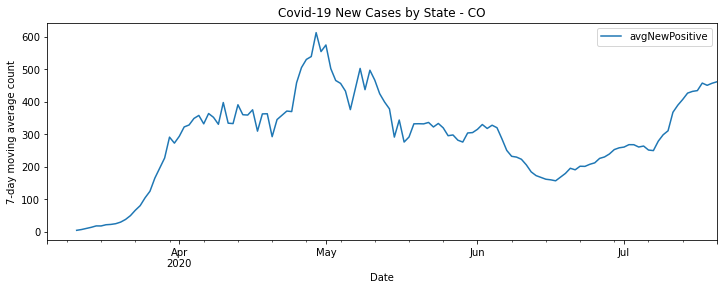

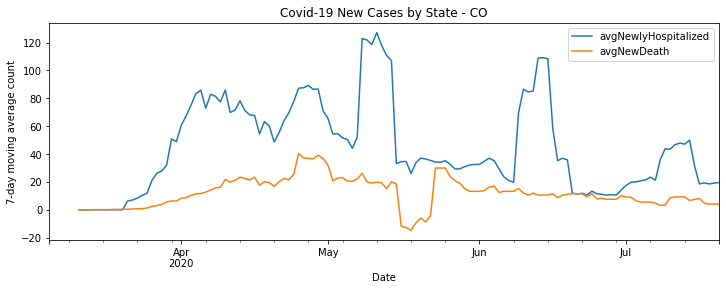

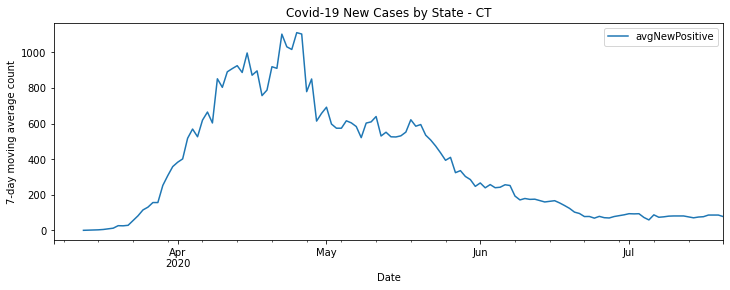

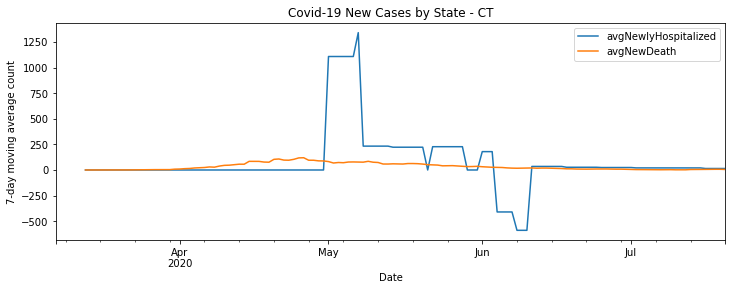

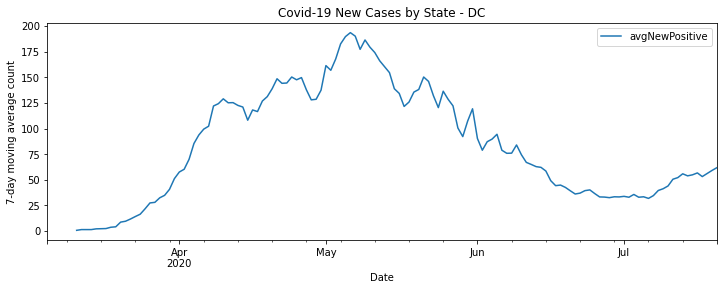

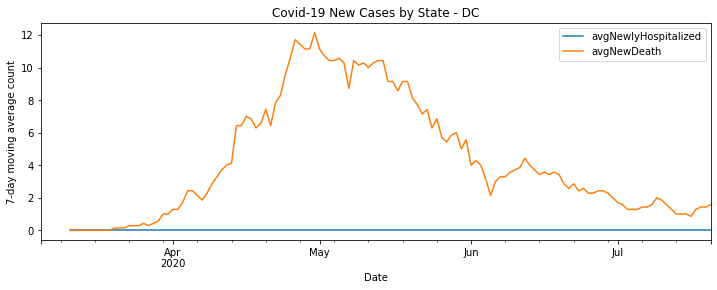

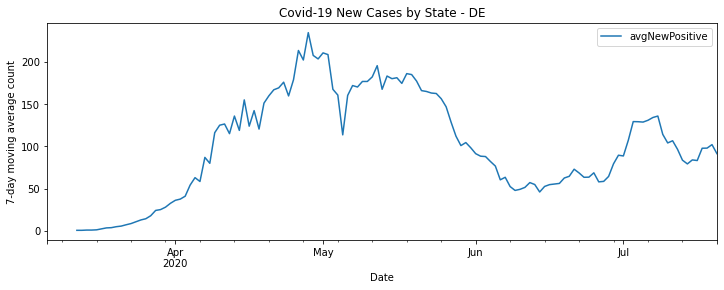

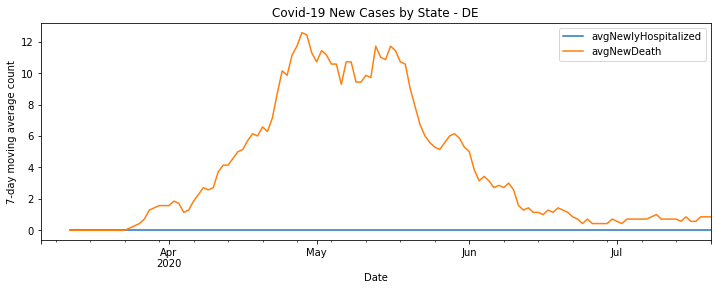

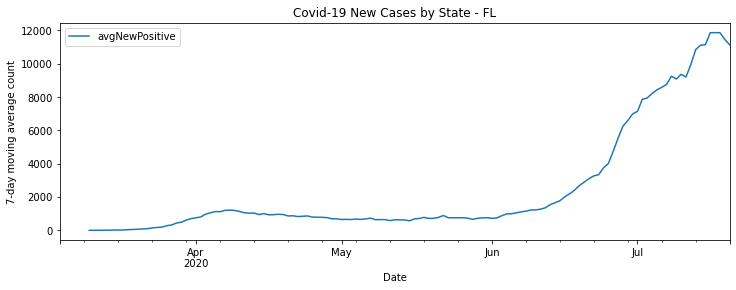

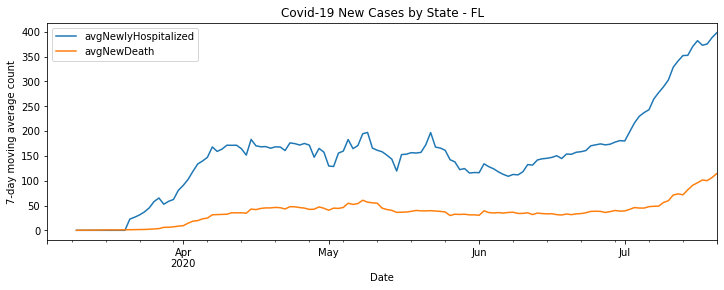

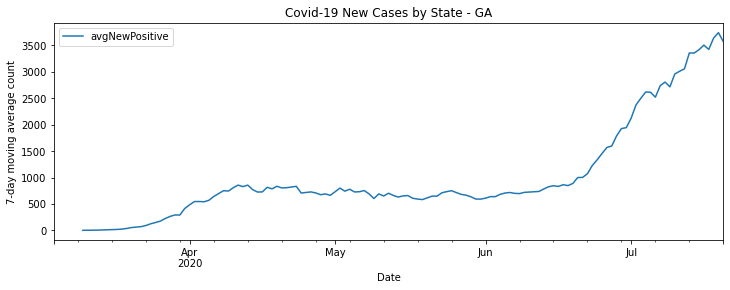

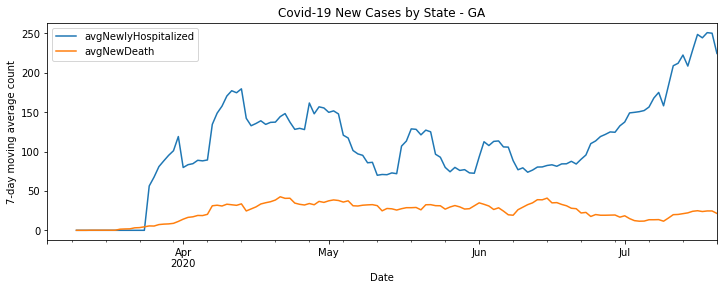

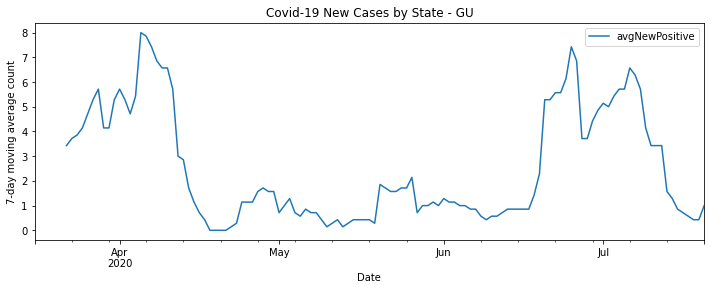

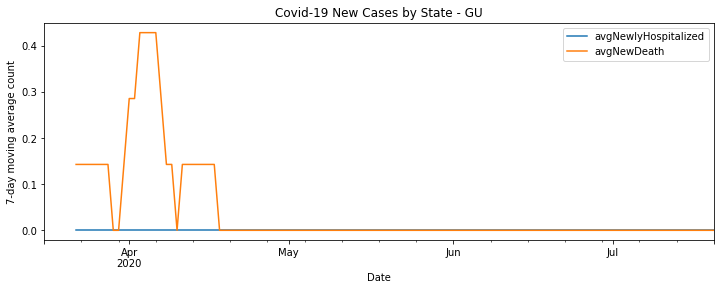

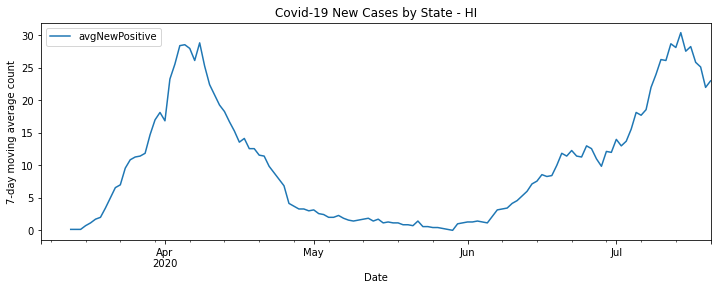

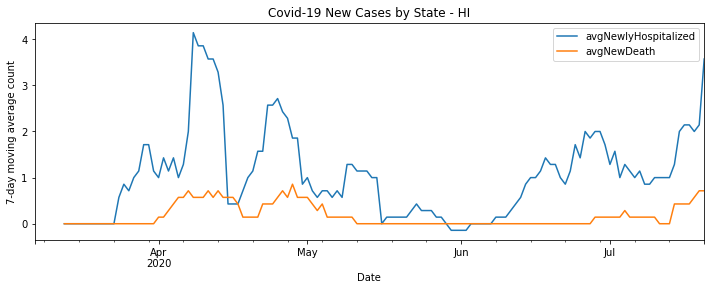

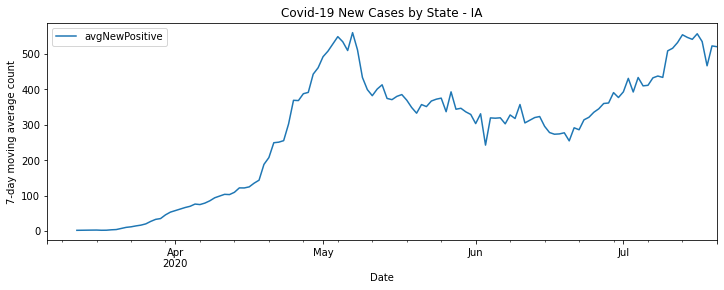

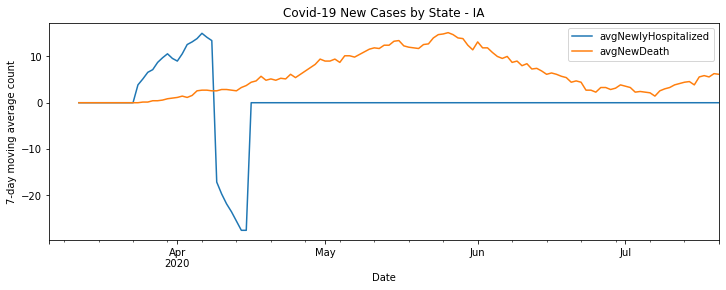

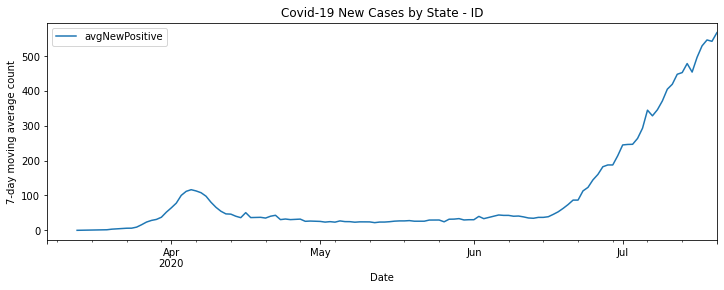

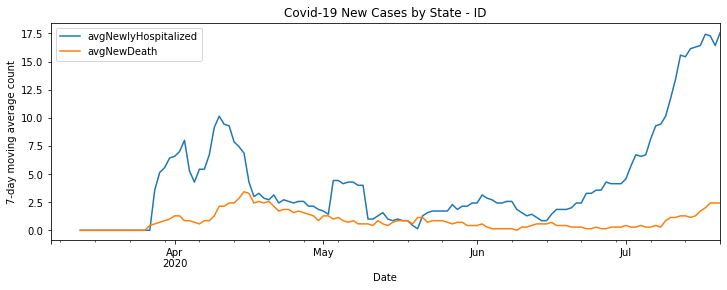

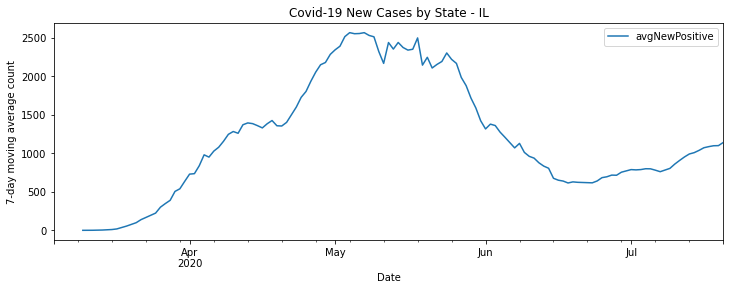

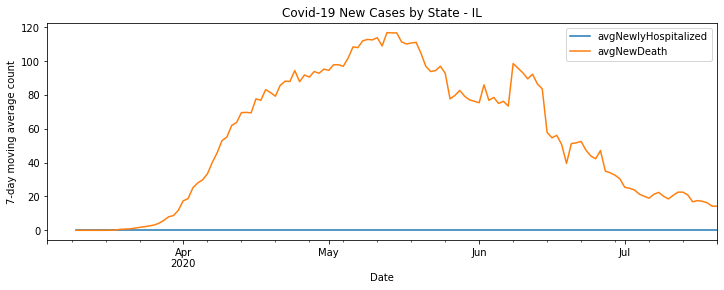

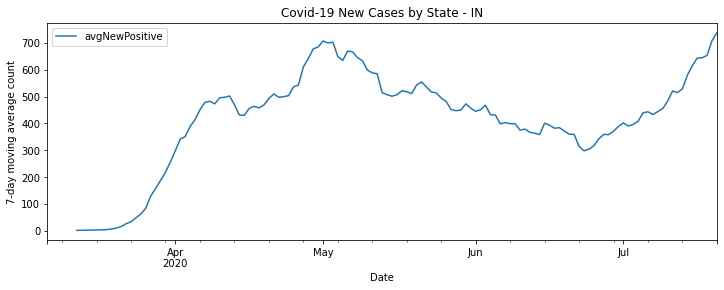

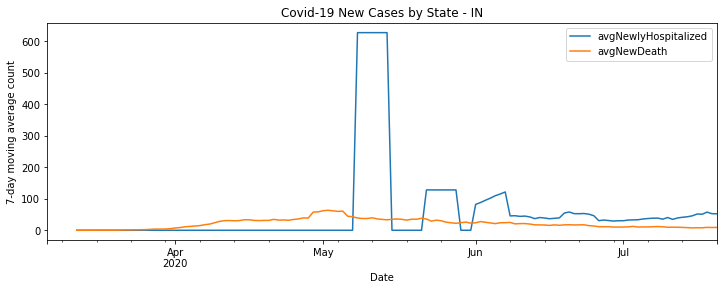

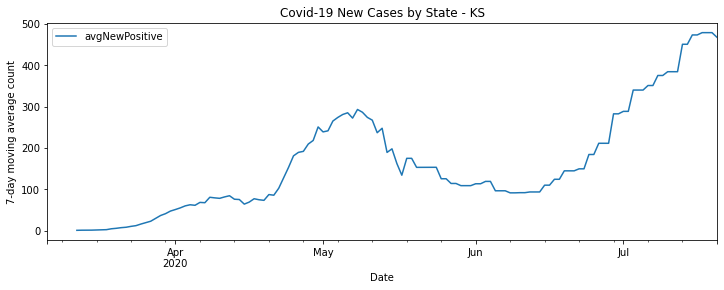

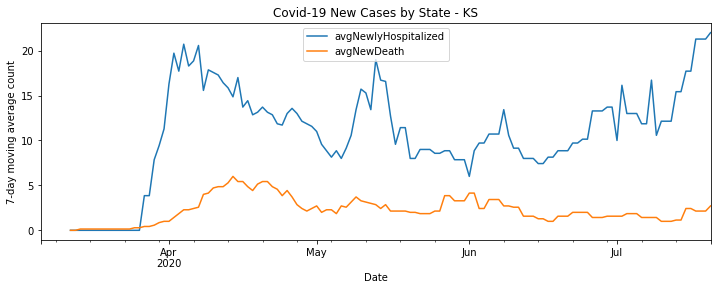

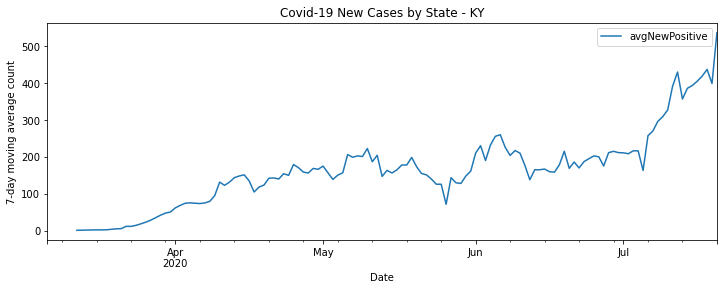

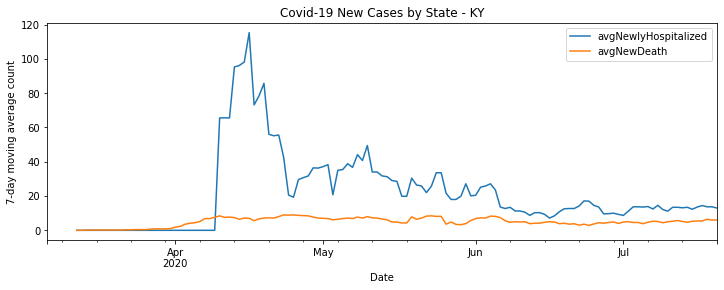

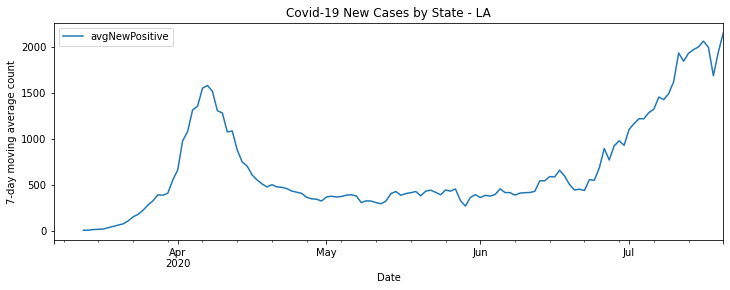

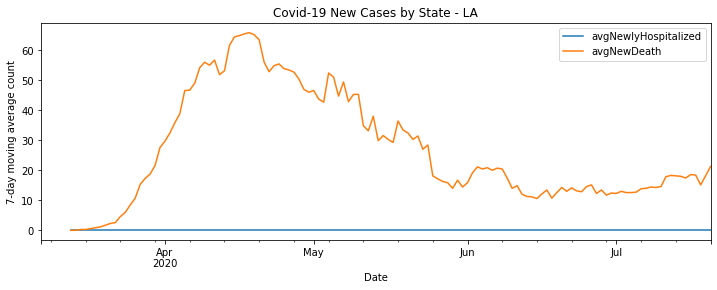

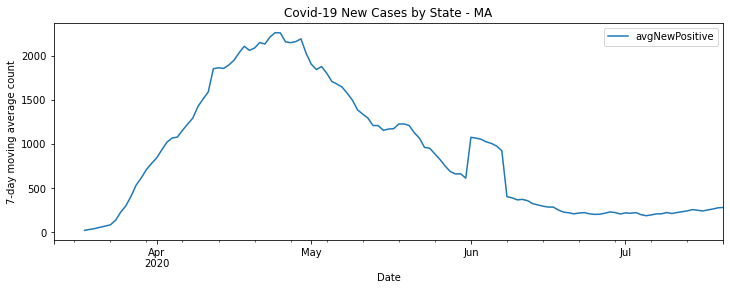

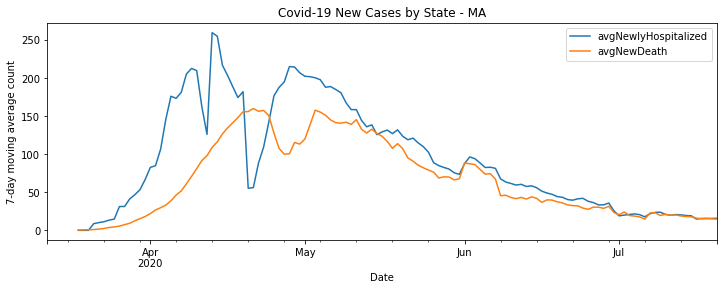

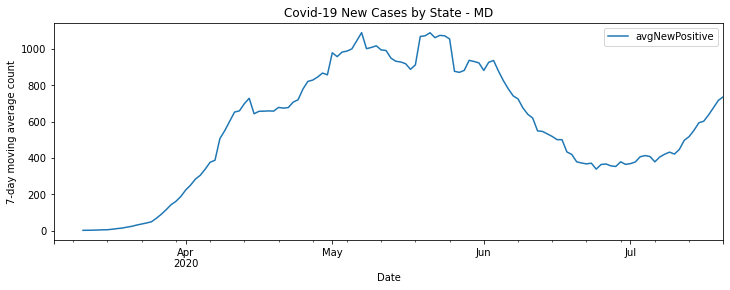

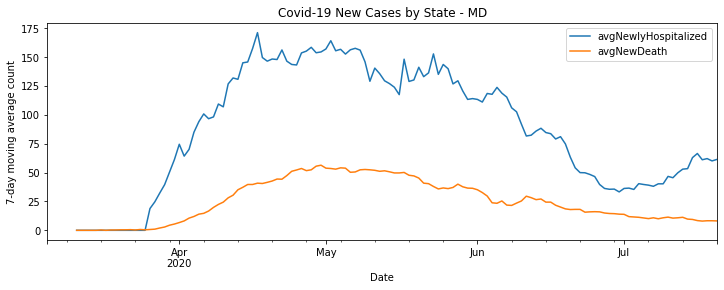

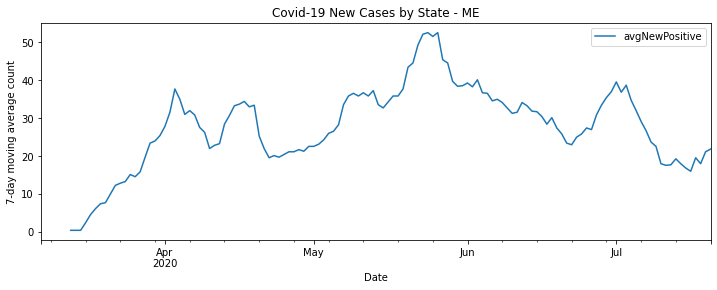

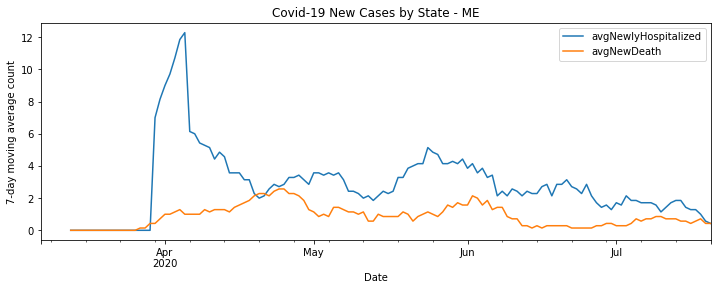

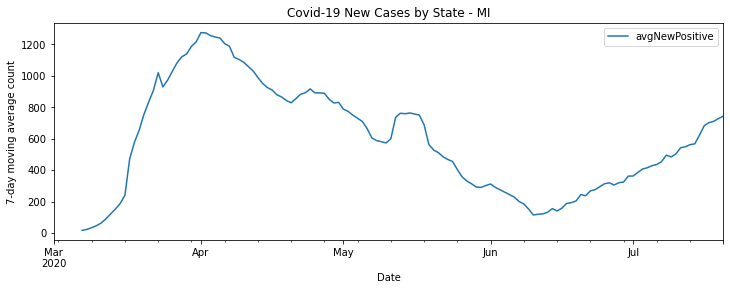

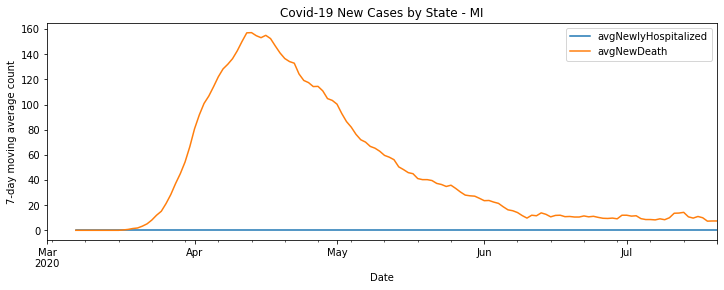

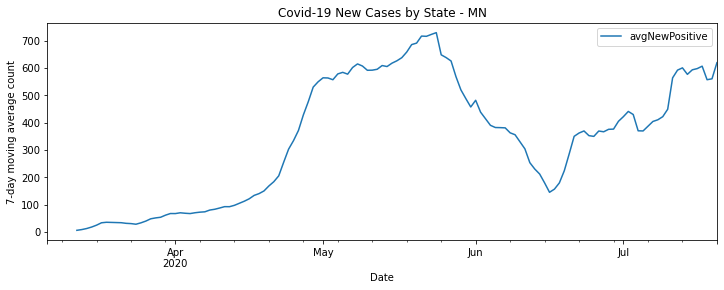

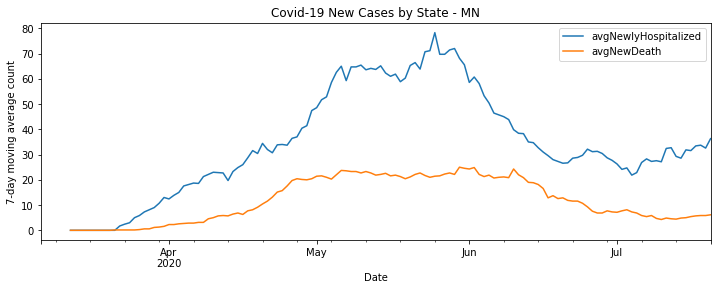

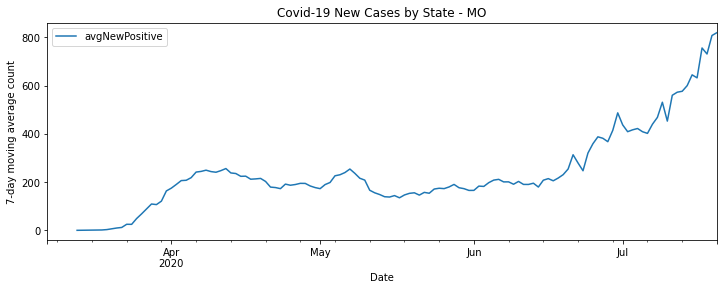

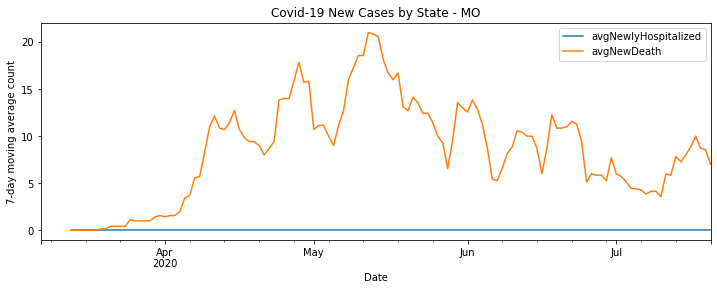

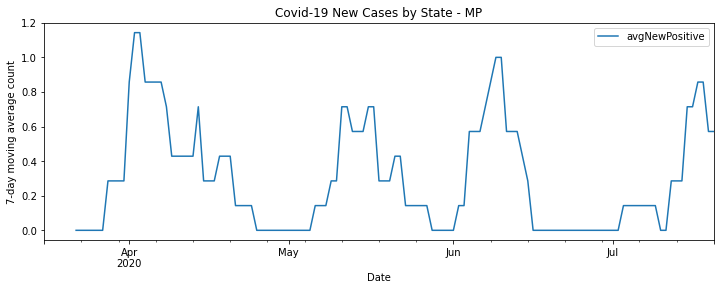

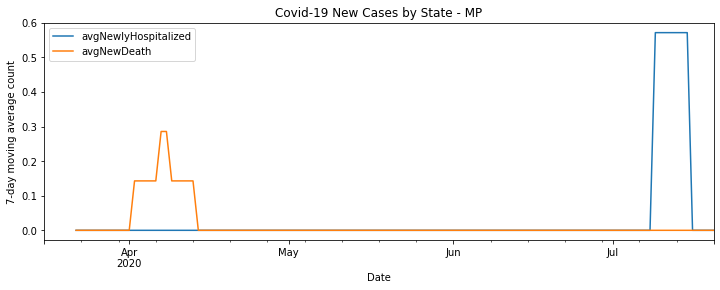

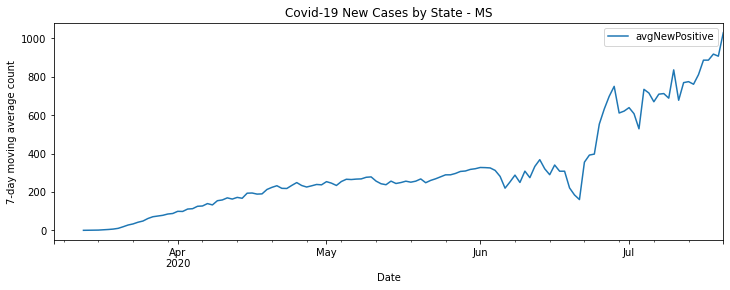

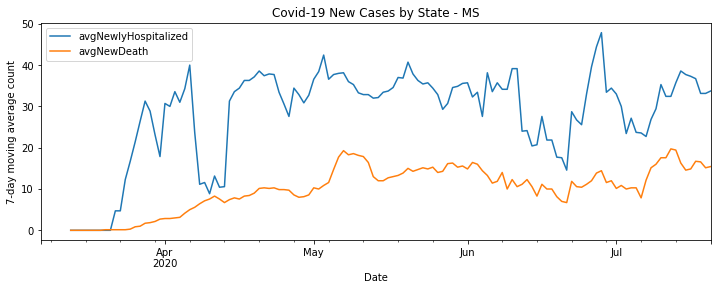

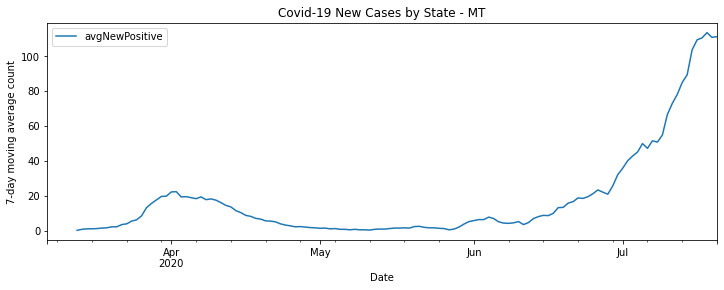

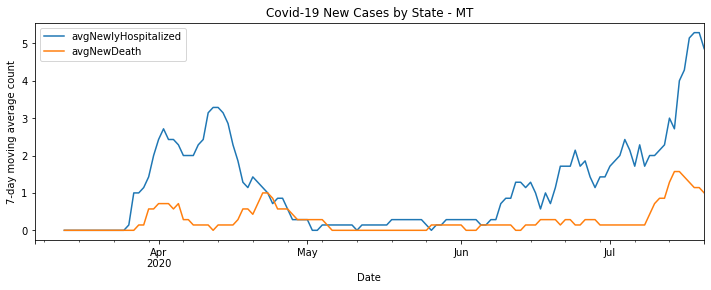

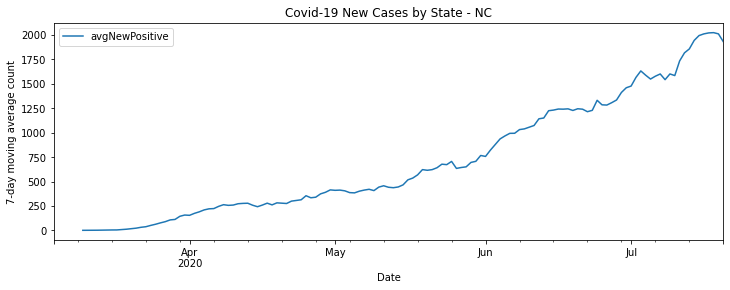

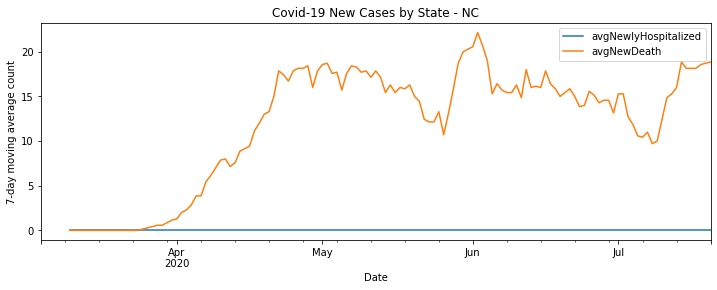

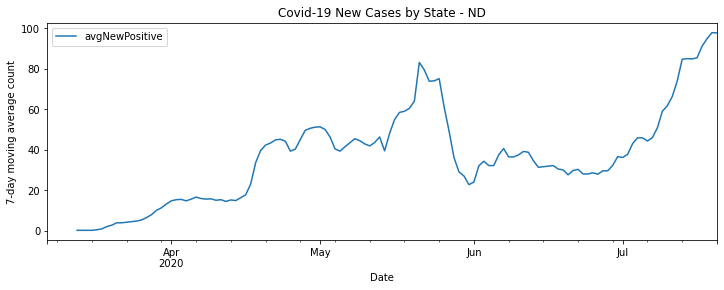

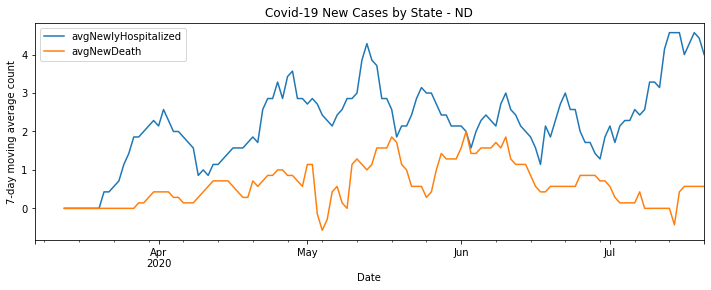

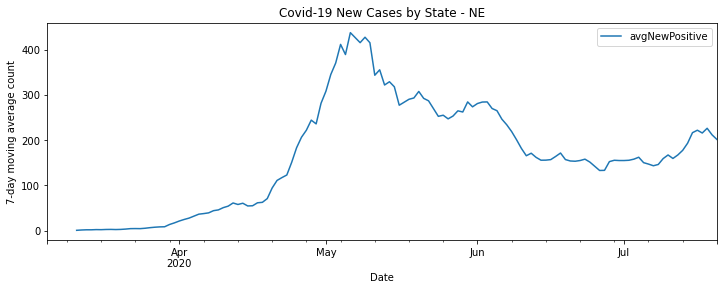

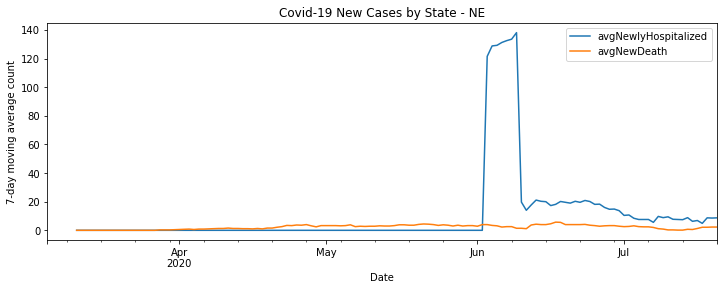

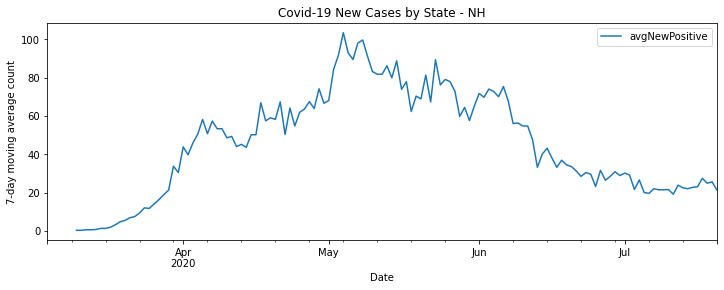

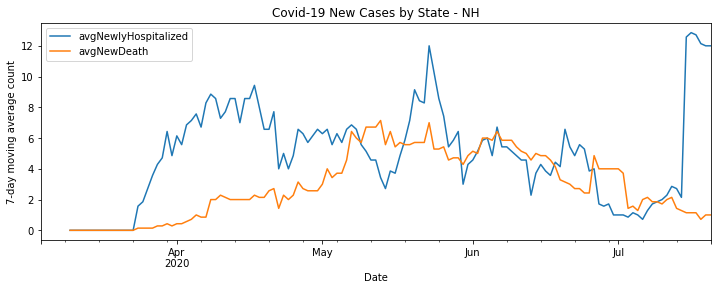

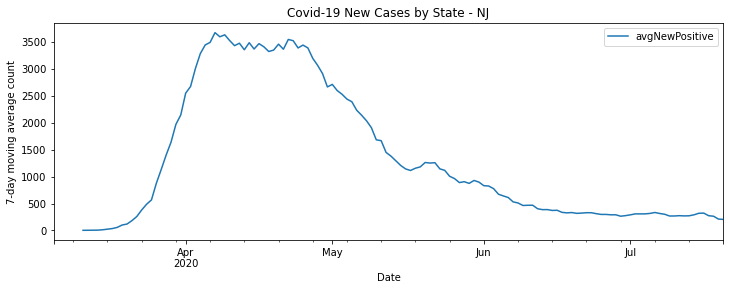

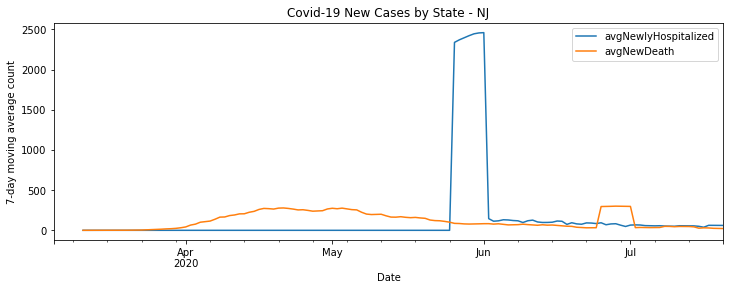

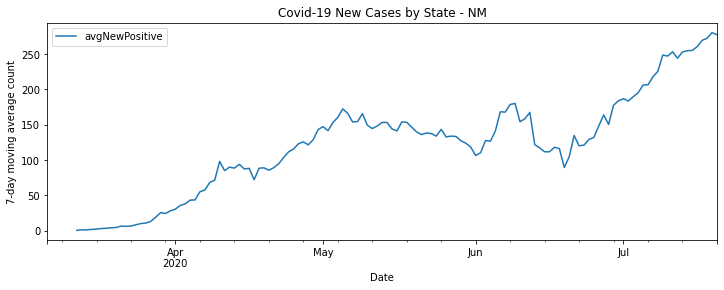

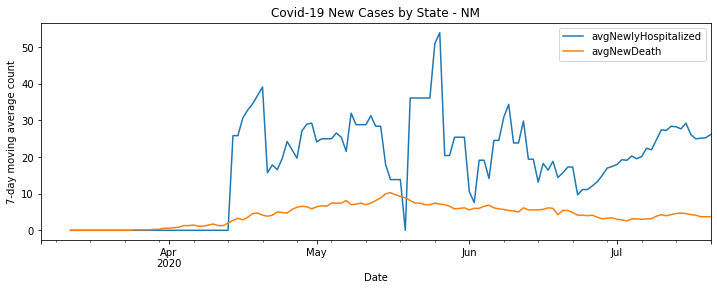

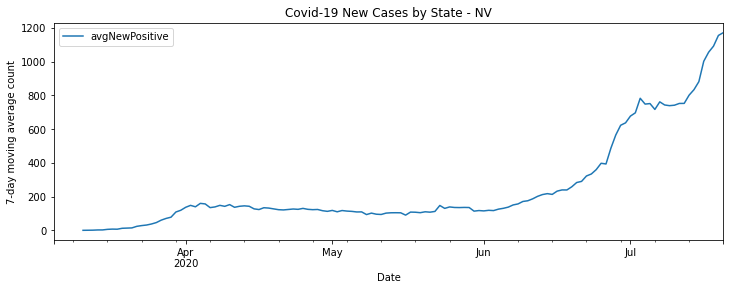

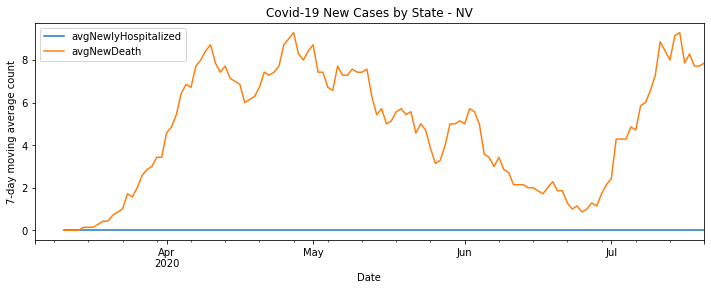

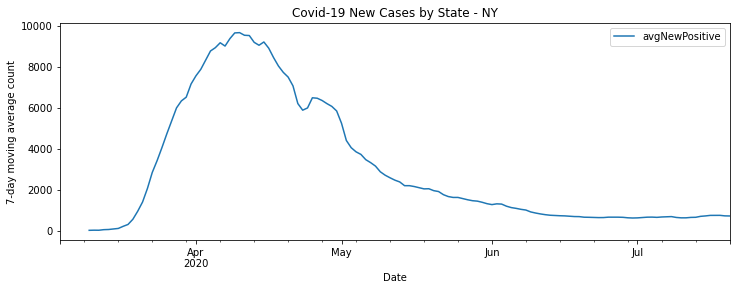

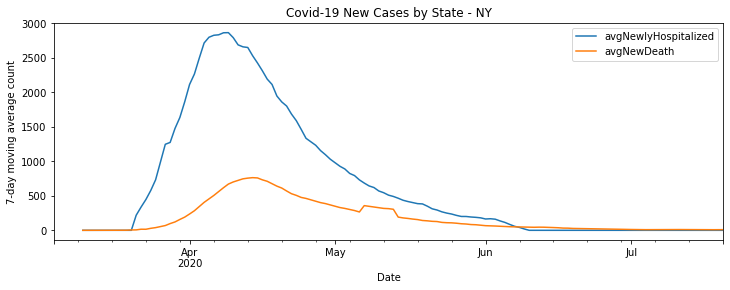

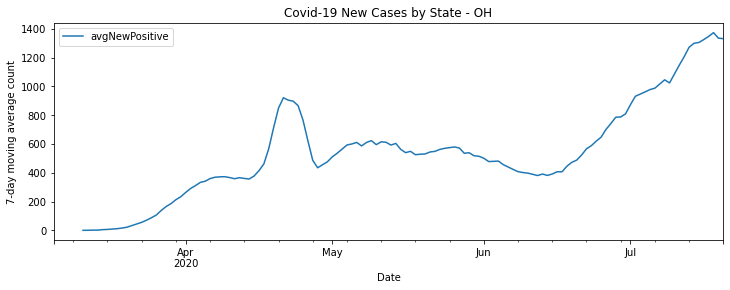

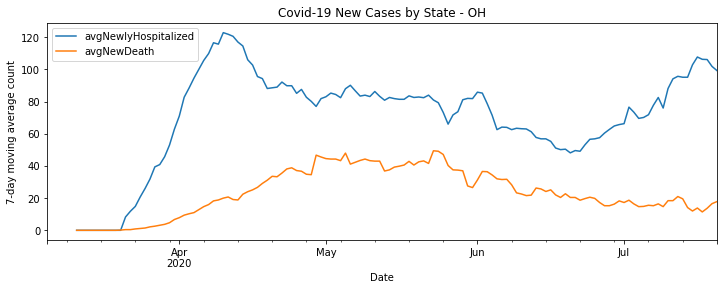

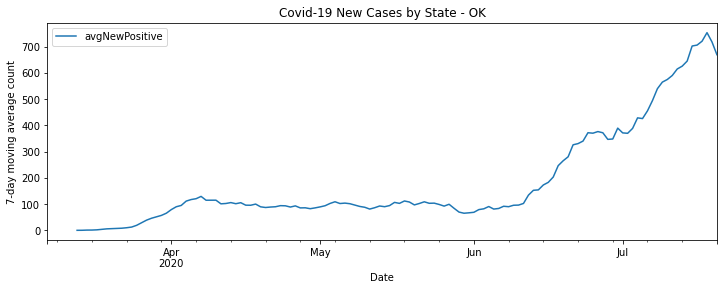

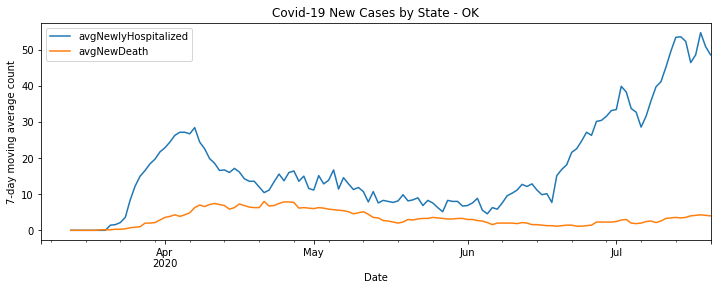

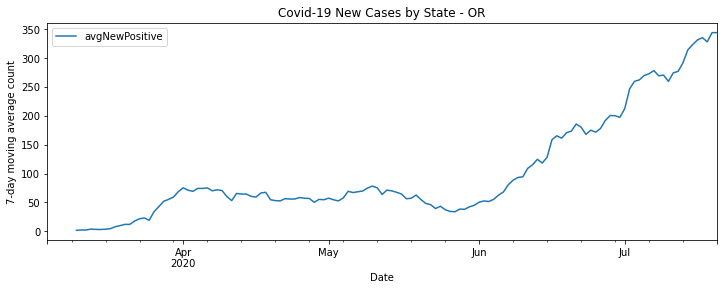

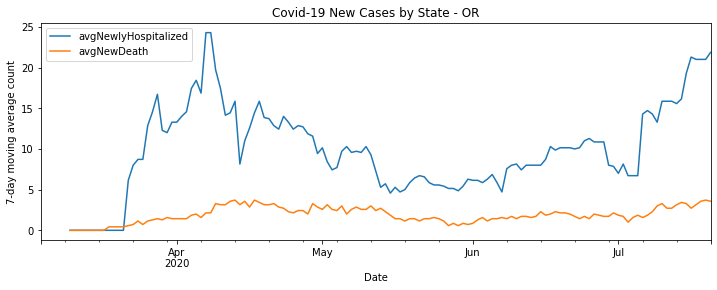

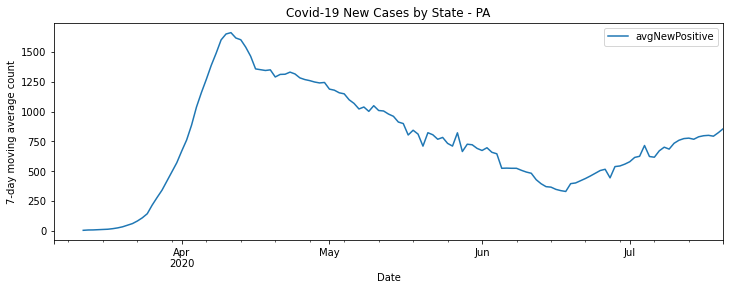

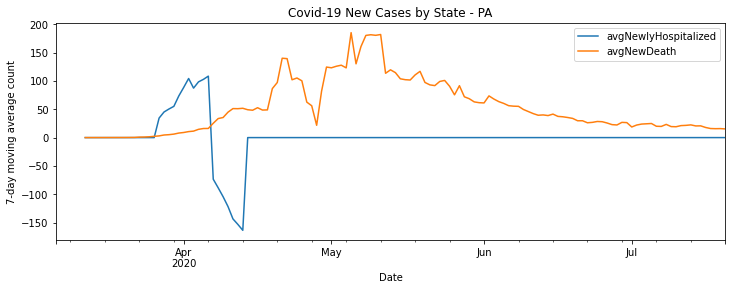

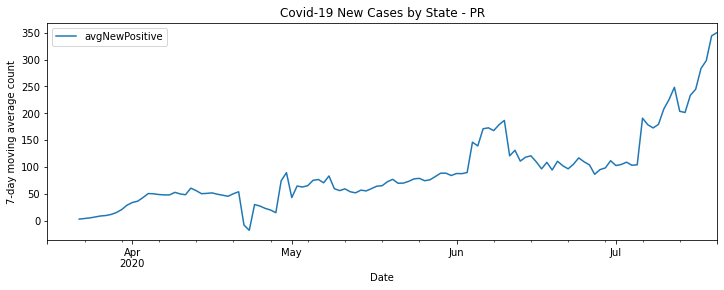

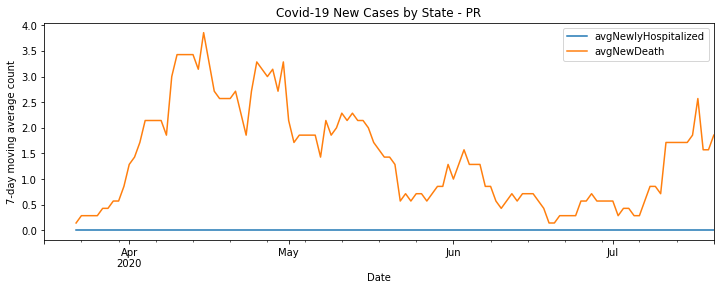

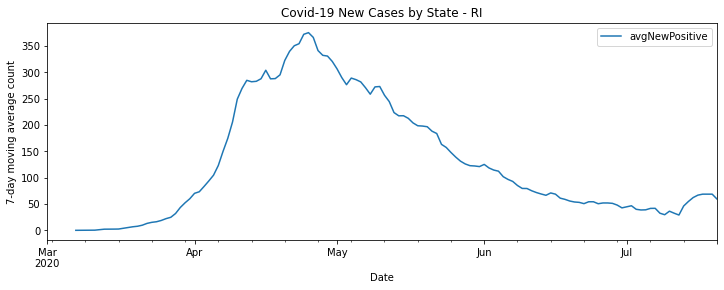

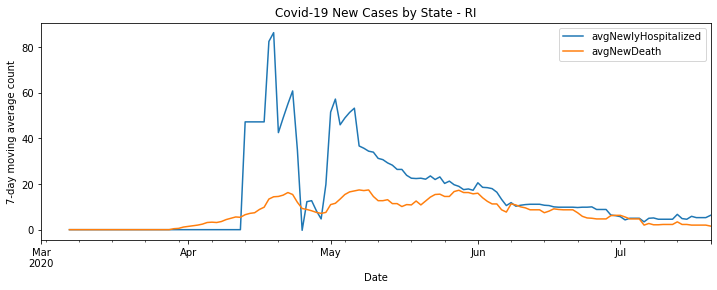

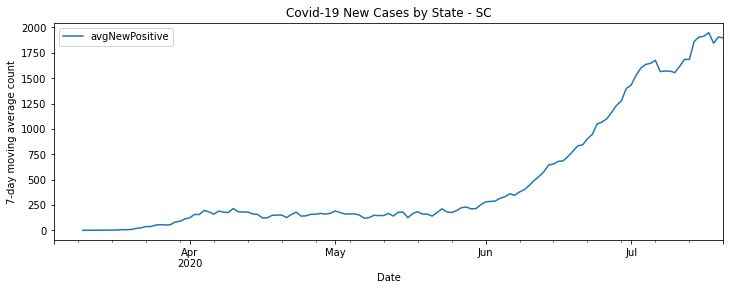

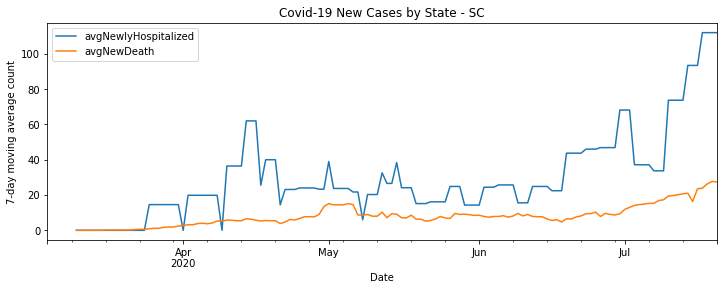

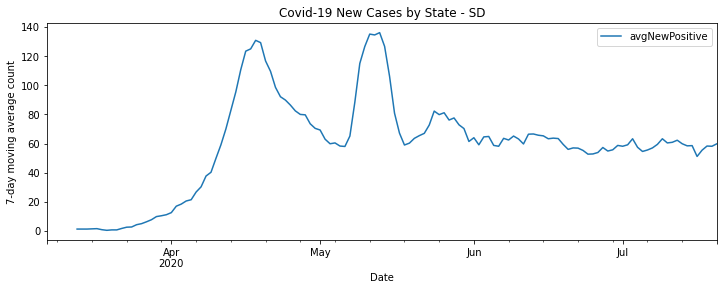

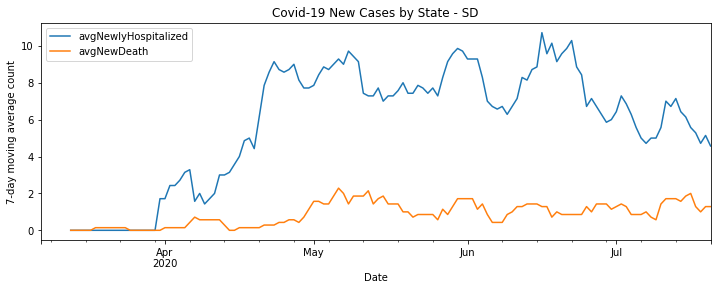

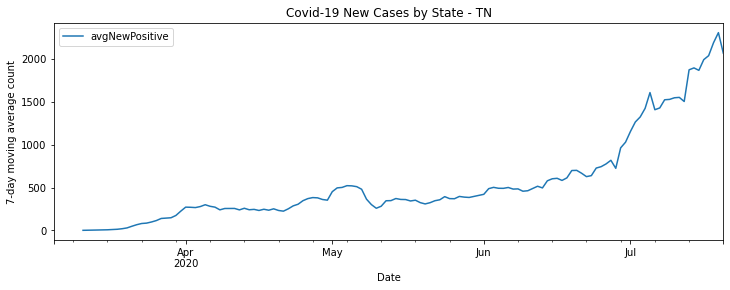

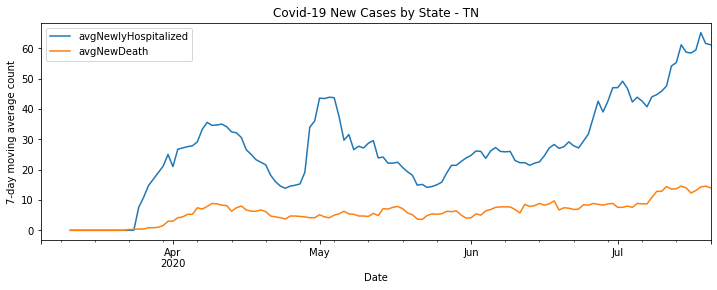

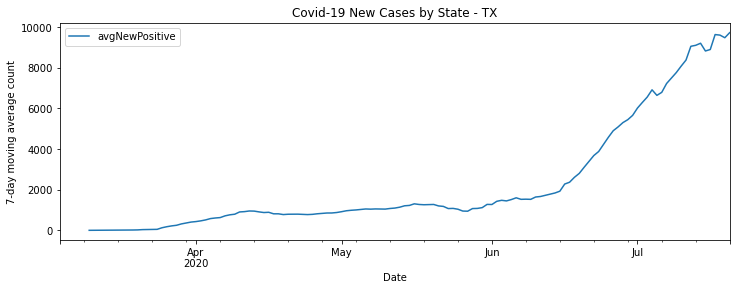

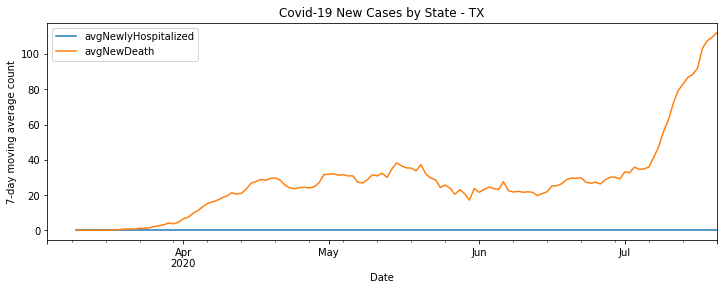

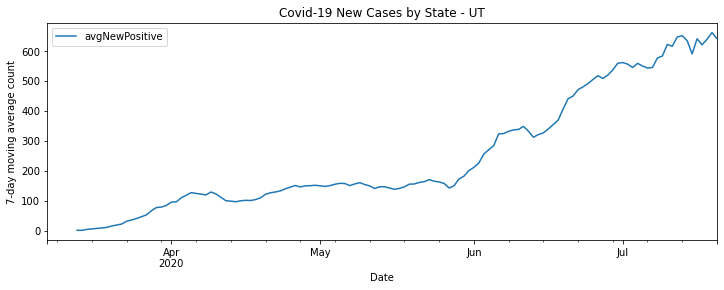

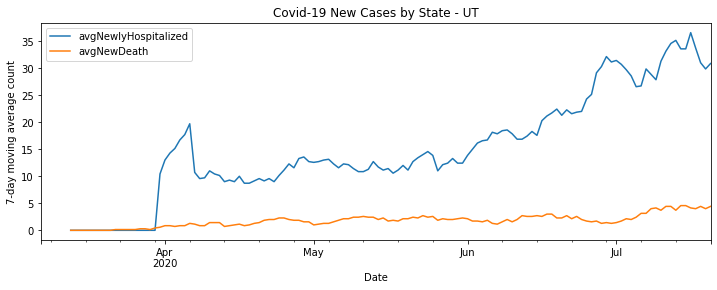

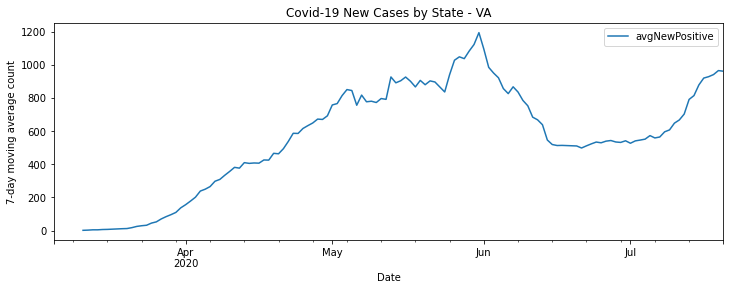

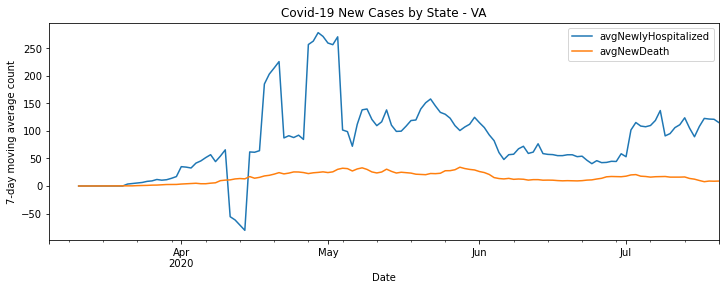

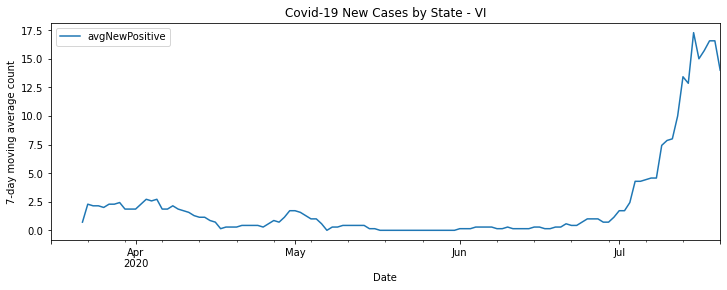

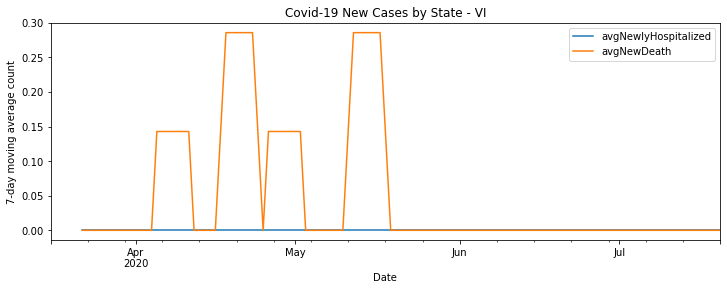

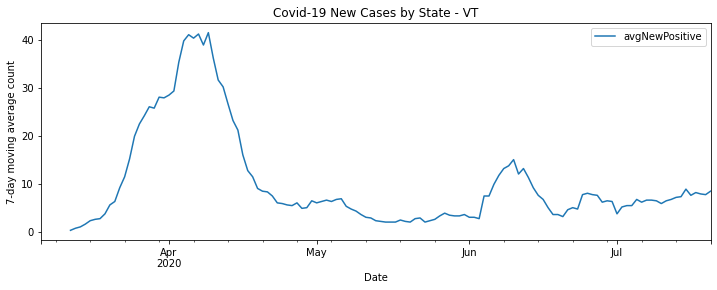

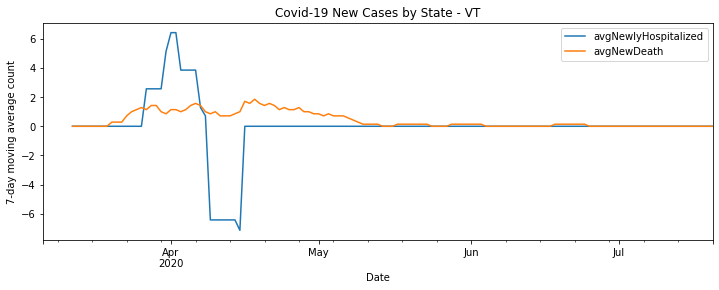

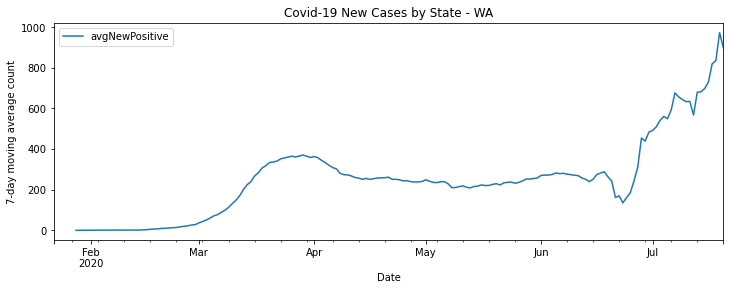

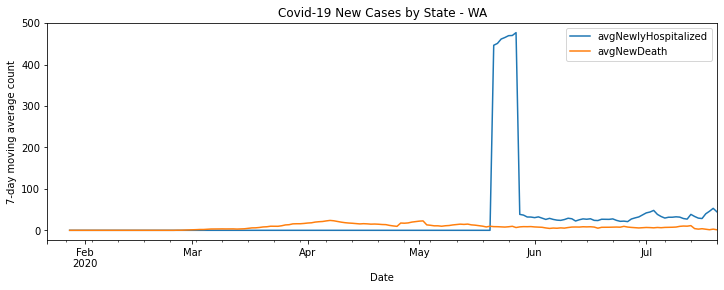

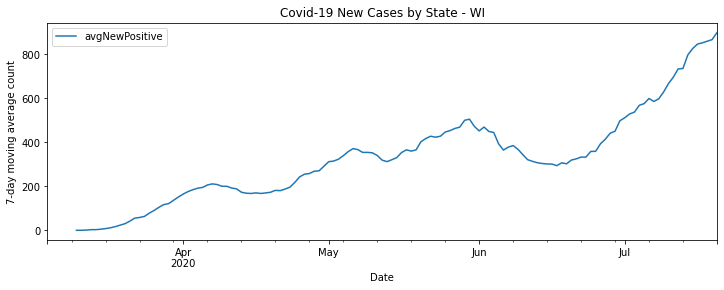

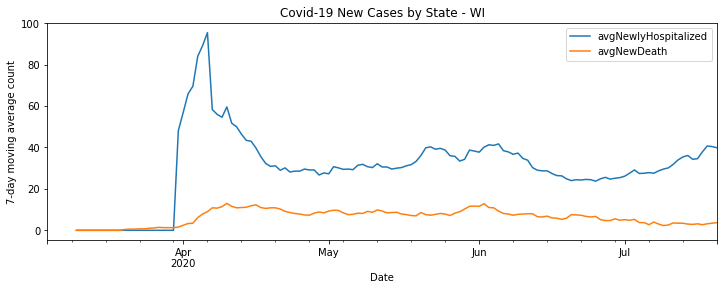

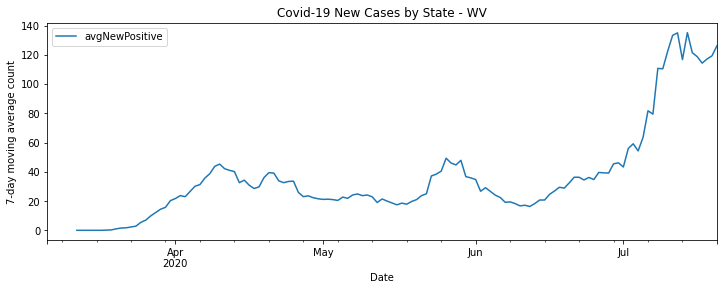

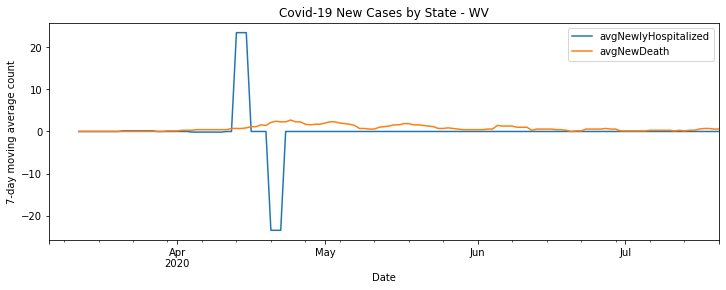

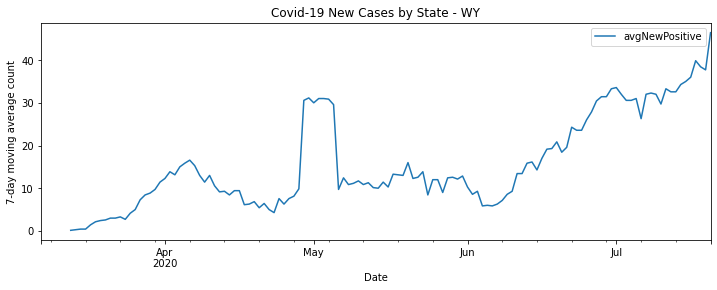

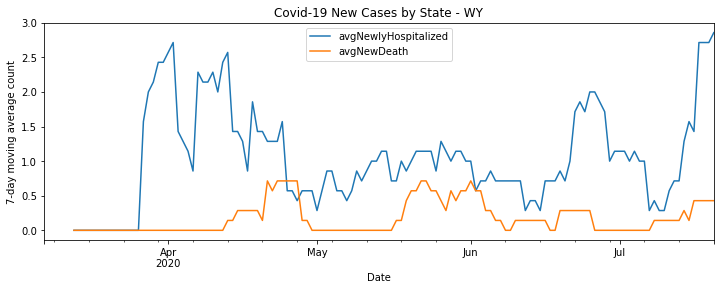

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Covid-19 daily data for all states from the Covid Tracking Project
url = "https://covidtracking.com//api/v1/states/daily.csv"
data = pd.read_csv(url, sep=",")
state_data = data[['date', 'state', 'hospitalizedIncrease',
                   'deathIncrease', 'positiveIncrease']].copy()
state_data['date'] = pd.to_datetime(state_data['date'], format='%Y%m%d')
state_data = state_data.sort_values('state', ascending=True)
# get the list of states reported
state_list = state_data.state.unique()

# go over all states to generate line plots
plt.rcParams.update({'figure.max_open_warning': 0})

for name in state_list:
    cur_state_data = state_data.loc[state_data['state'] == name,:].copy()
    cur_state_data = cur_state_data.sort_values('date', ascending=True)

    # calculate weekly moving average
    cur_state_data['avgNewPositive'] = cur_state_data.iloc[:,4].rolling(window=7).mean()
    cur_state_data['avgNewlyHospitalized'] = cur_state_data.iloc[:,2].rolling(window=7).mean()
    cur_state_data['avgNewDeath'] = cur_state_data.iloc[:,3].rolling(window=7).mean()
    cur_state_data = cur_state_data.set_index('date')


    # set report title
    plot_title = "Covid-19 New Cases by State - " + name

    report_data = cur_state_data[["avgNewPositive"]]
    ax = report_data.plot(title=plot_title, figsize=(12, 4))
    ax.set_xlabel("Date")
    ax.set_ylabel("7-day moving average count")
    plt.show()

    report_data = cur_state_data[["avgNewlyHospitalized", "avgNewDeath"]]
    ax = report_data.plot(title=plot_title, figsize=(12, 4))
    ax.set_xlabel("Date")
    ax.set_ylabel("7-day moving average count")
    plt.show()

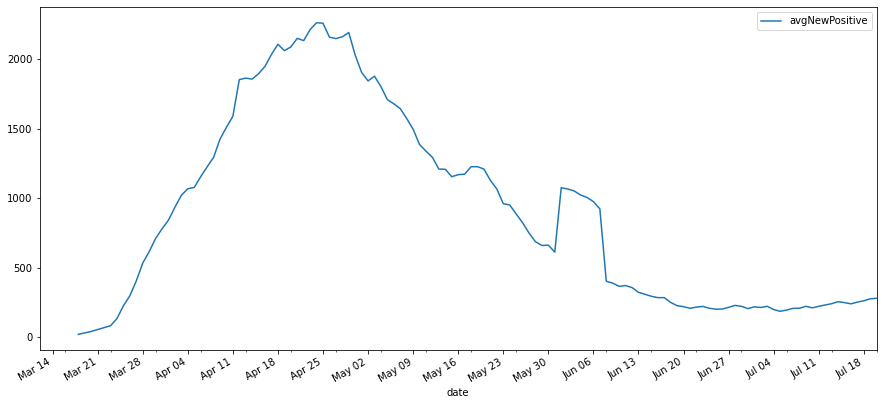

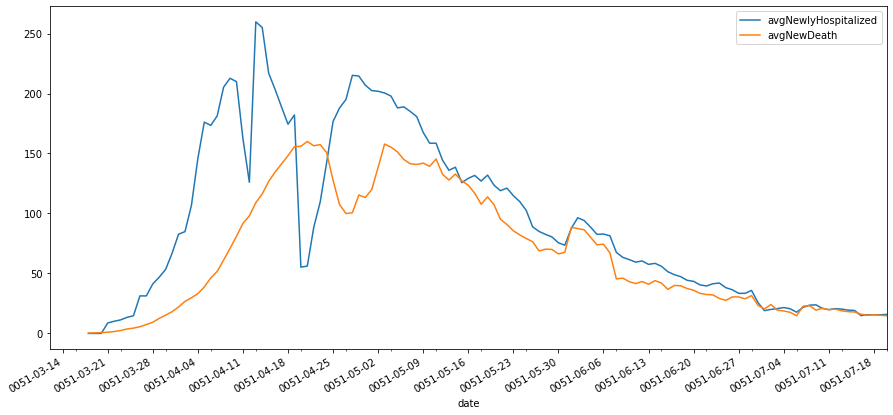

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.ticker as ticker



# Covid-19 daily data for all states from the Covid Tracking Project
url = "https://covidtracking.com//api/v1/states/daily.csv"
data = pd.read_csv(url, sep=",")
state_data = data[['date', 'state', 'hospitalizedIncrease',
                   'deathIncrease', 'positiveIncrease']].copy()
state_data['date'] = pd.to_datetime(state_data['date'], format='%Y%m%d')
#state_data['date'] = dateconv(state_data['date'])
state_data = state_data.sort_values('state', ascending=True)
# get the list of states reported
state_list = state_data.state.unique()

# go over all states to generate line plots
plt.rcParams.update({'figure.max_open_warning': 0})

#for name in state_list:
name = "MA"
cur_state_data = state_data.loc[state_data['state'] == name,:].copy()
cur_state_data = cur_state_data.sort_values('date', ascending=True)

# calculate weekly moving average
cur_state_data['avgNewPositive'] = cur_state_data.iloc[:,4].rolling(window=7).mean()
cur_state_data['avgNewlyHospitalized'] = cur_state_data.iloc[:,2].rolling(window=7).mean()
cur_state_data['avgNewDeath'] = cur_state_data.iloc[:,3].rolling(window=7).mean()
cur_state_data = cur_state_data.set_index('date')

#plot data
report_data = cur_state_data[["avgNewPositive"]]
fig, ax = plt.subplots(figsize=(15,7), title = plot)
report_data.plot(ax=ax)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()
plt.show()

report_data = cur_state_data[["avgNewlyHospitalized", "avgNewDeath"]]
fig, ax = plt.subplots(figsize=(15,7))
report_data.plot(ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


# set report title
#plot_title = "Covid-19 New Cases by State - " + name
fig.autofmt_xdate()
plt.show()

#ax = report_data.plot(title=plot_title, figsize=(12, 4))
#ax.set_xlabel("Date")
#ax.set_ylabel("7-day moving average count")
#plt.show()

#report_data = cur_state_data[["avgNewlyHospitalized", "avgNewDeath"]]
#ax = report_data.plot(title=plot_title, figsize=(12, 4))
#ax.set_xlabel("Date")
#ax.set_ylabel("7-day moving average count")
#plt.show()

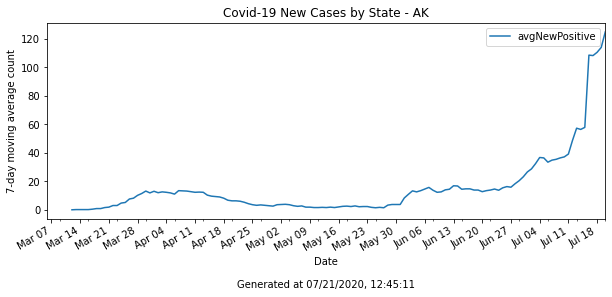

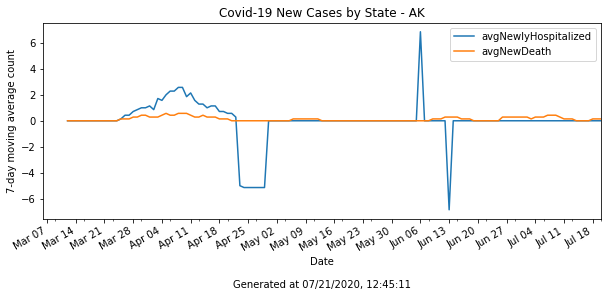

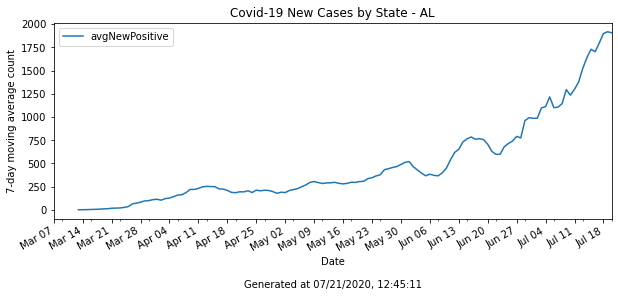

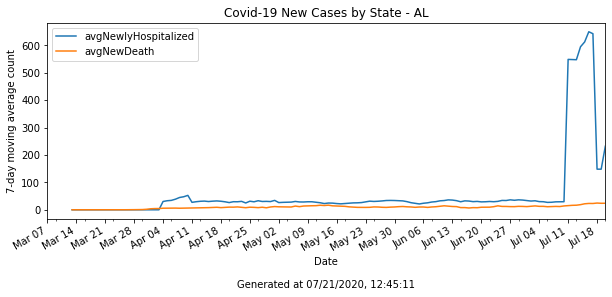

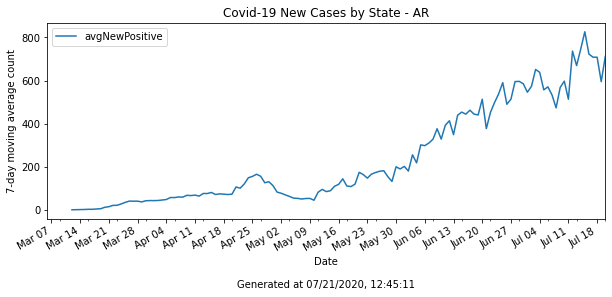

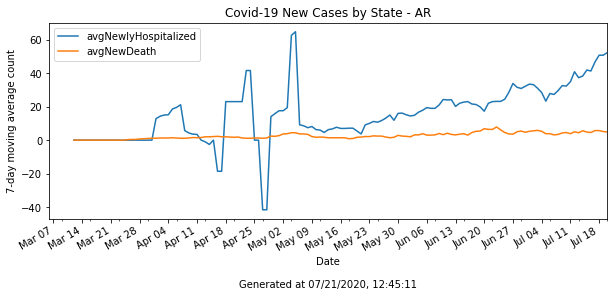

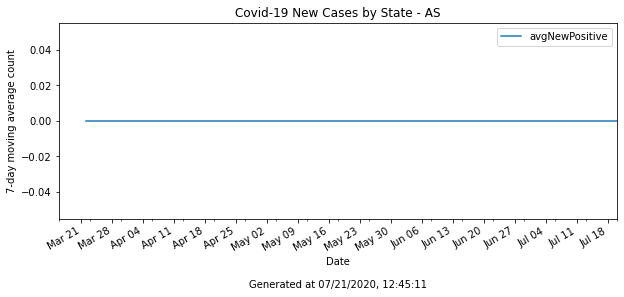

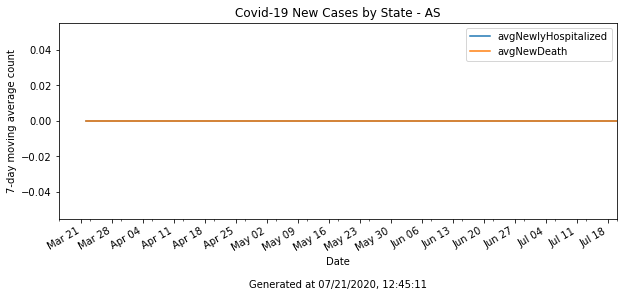

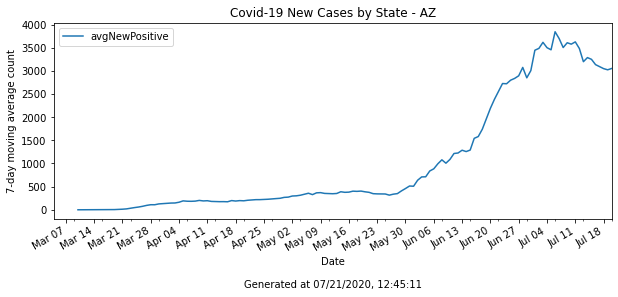

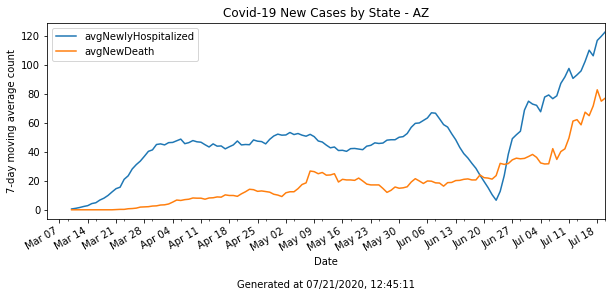

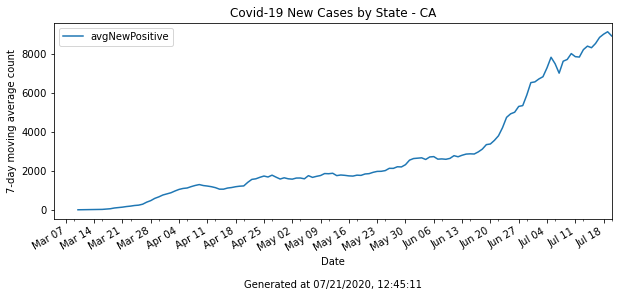

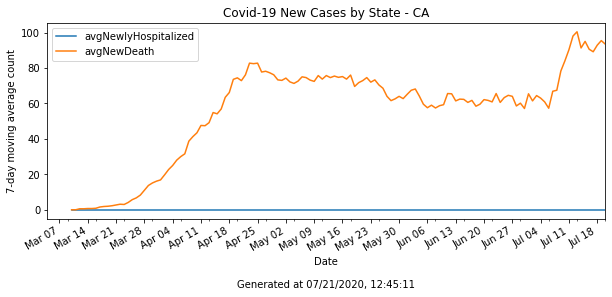

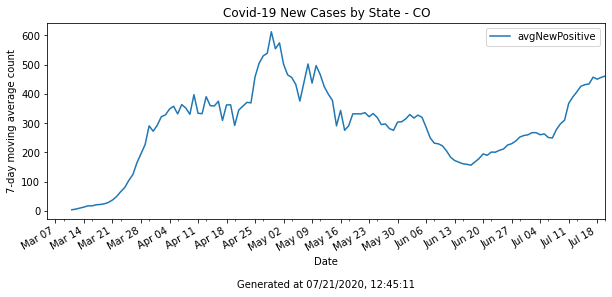

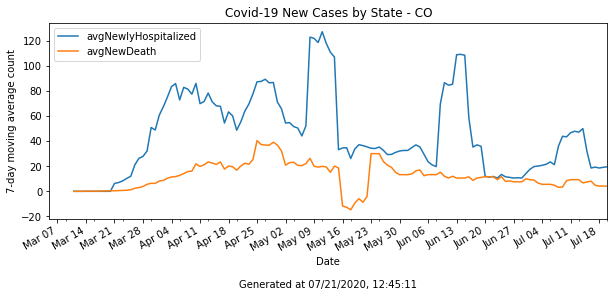

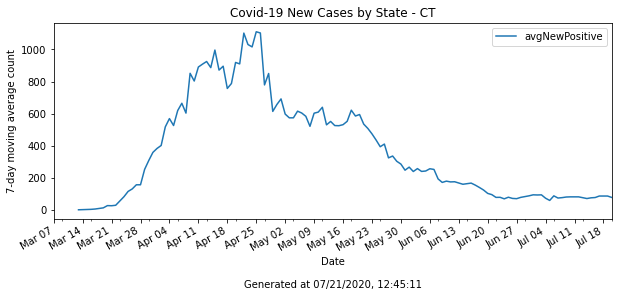

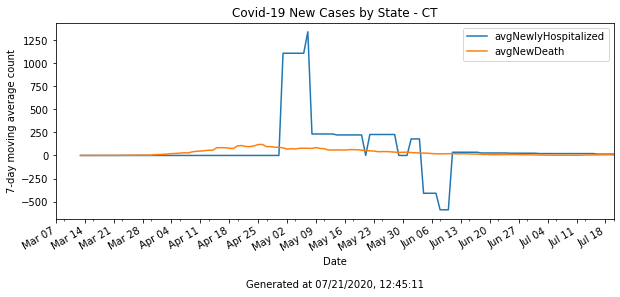

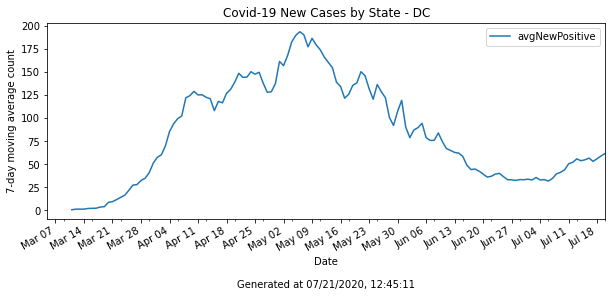

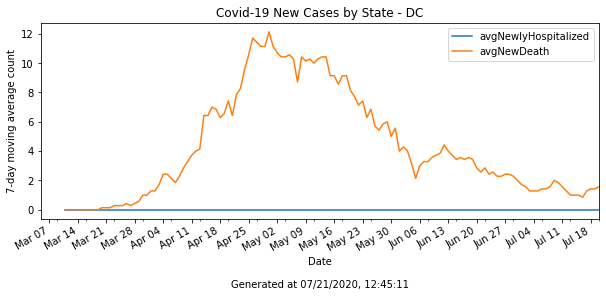

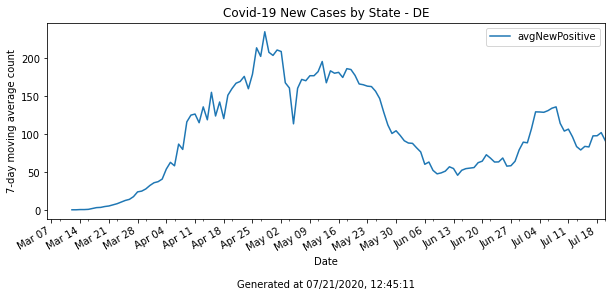

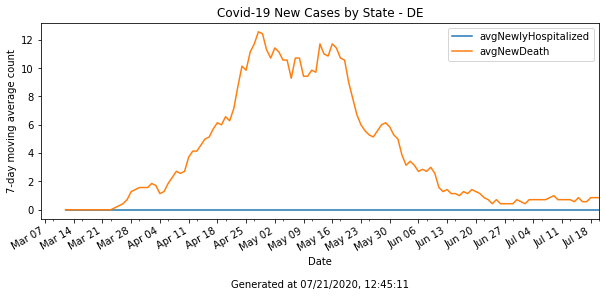

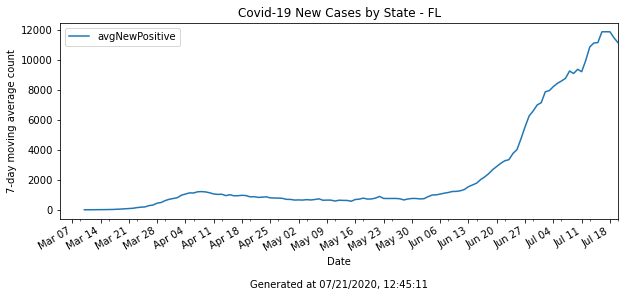

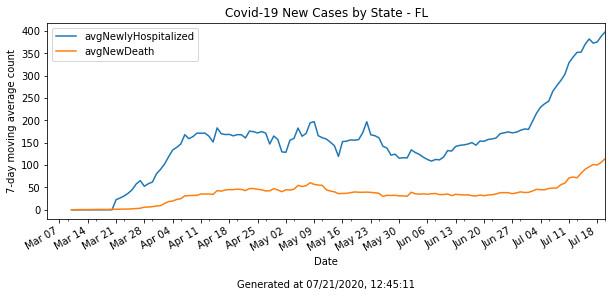

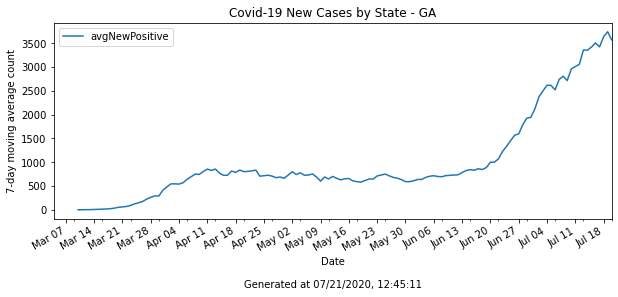

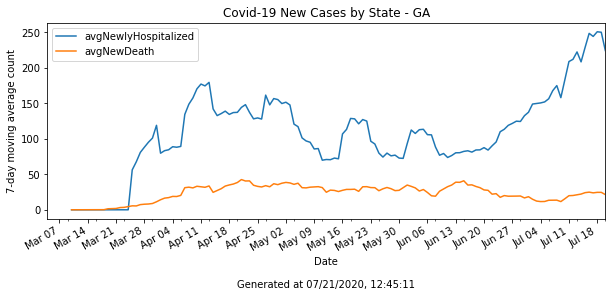

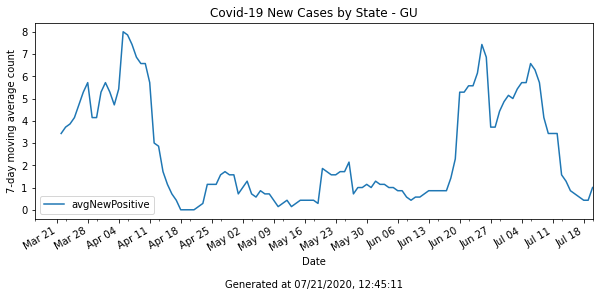

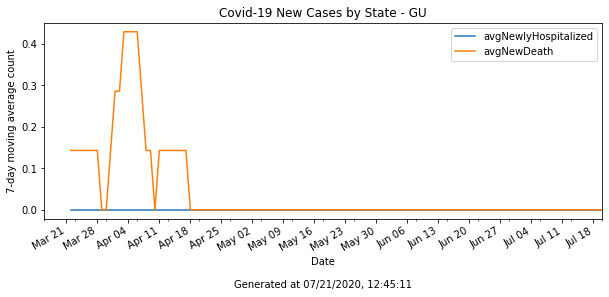

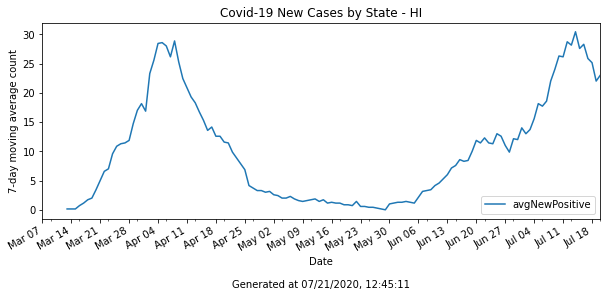

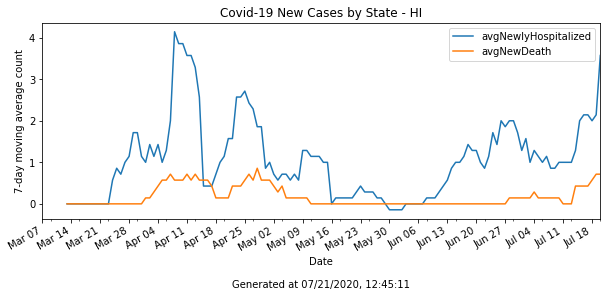

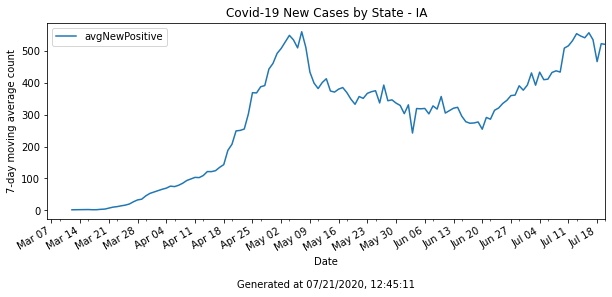

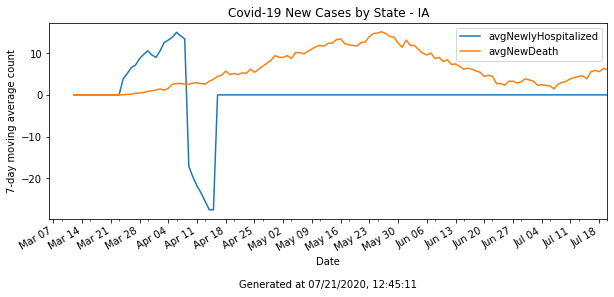

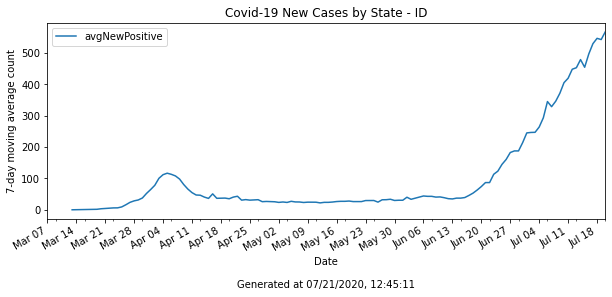

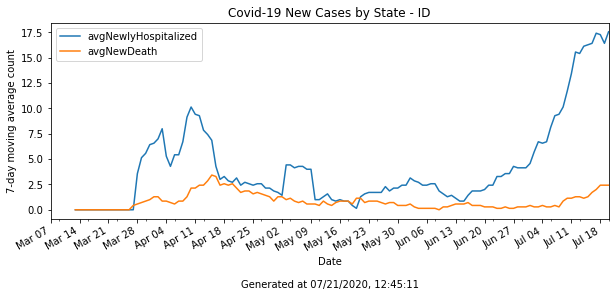

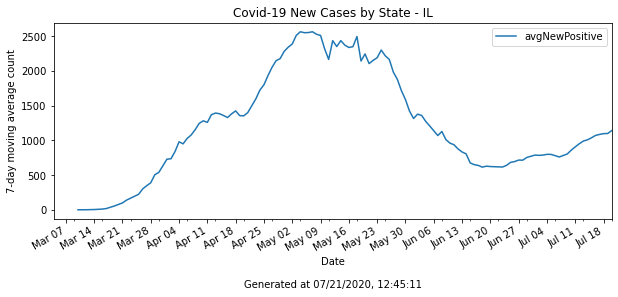

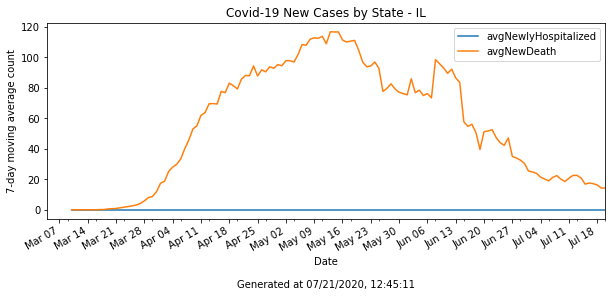

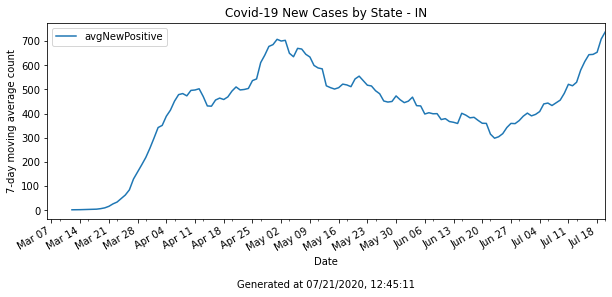

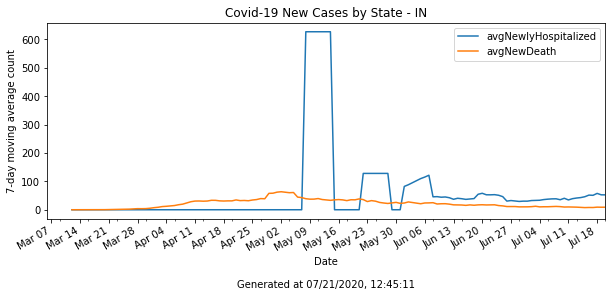

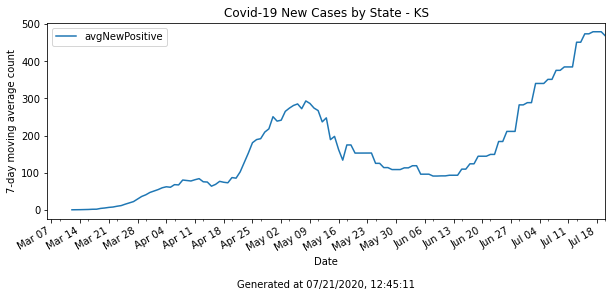

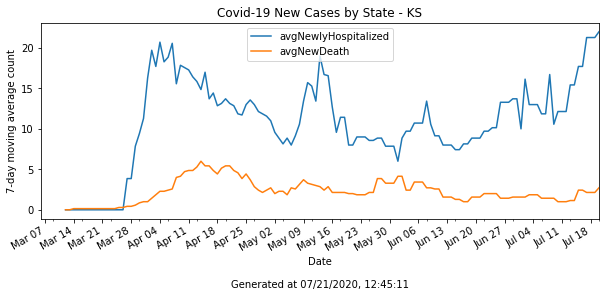

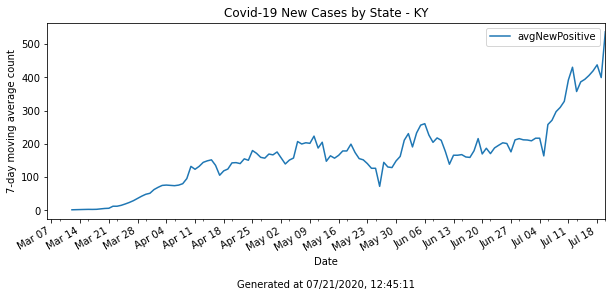

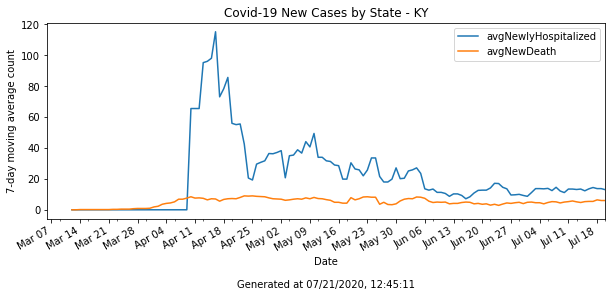

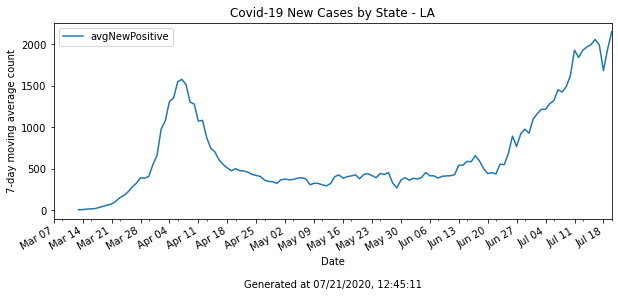

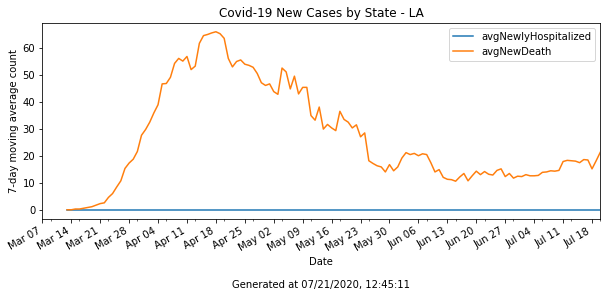

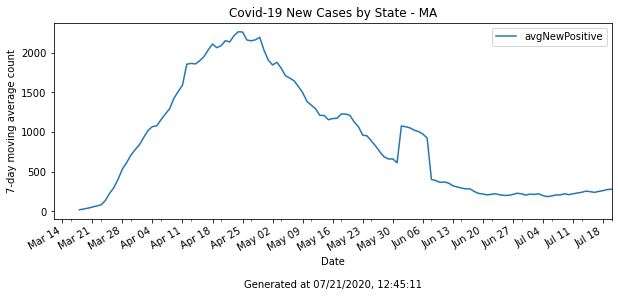

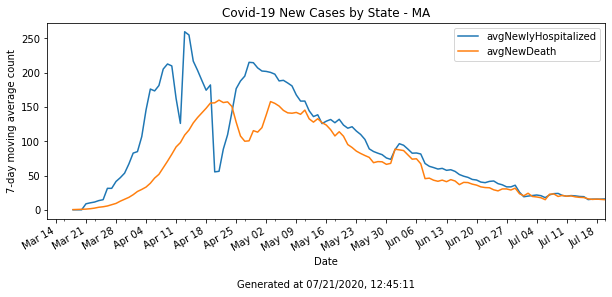

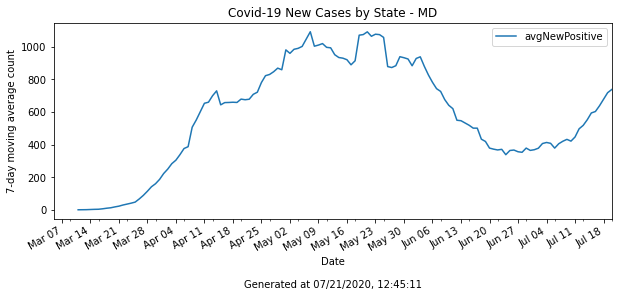

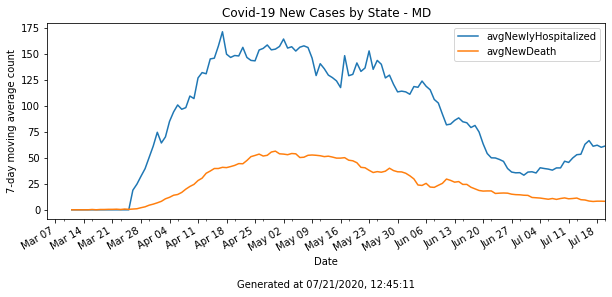

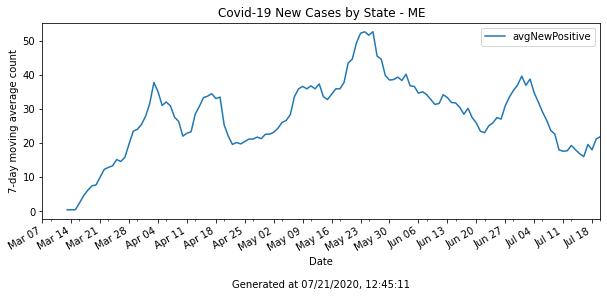

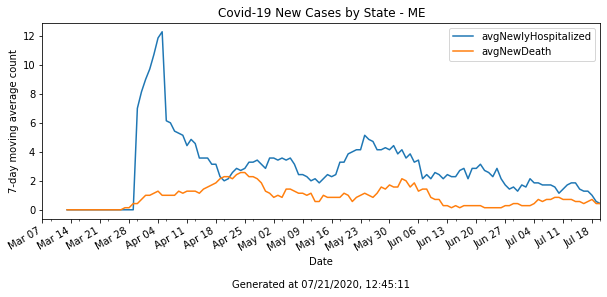

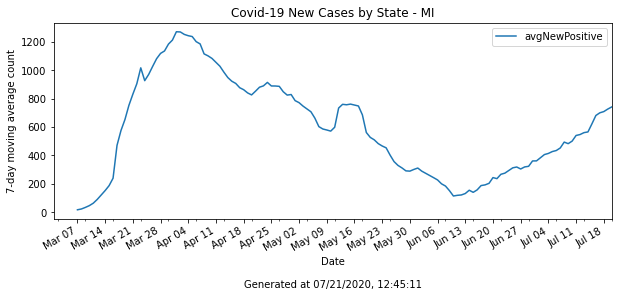

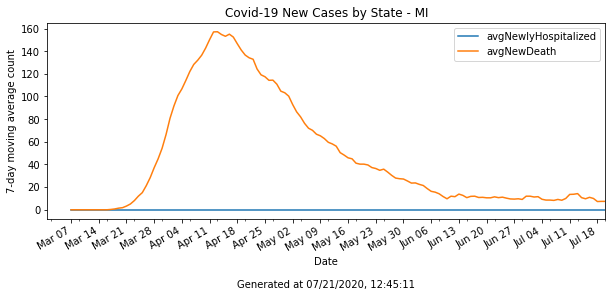

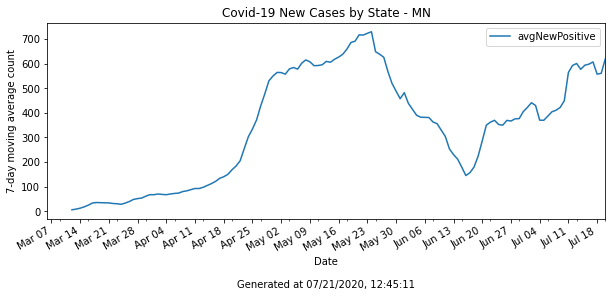

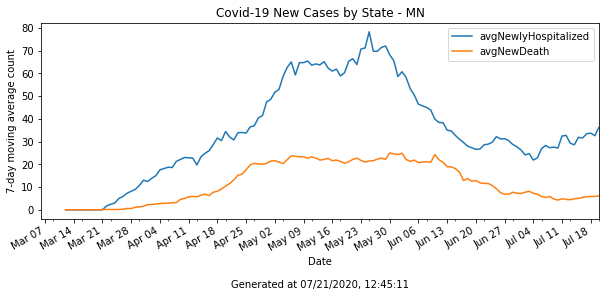

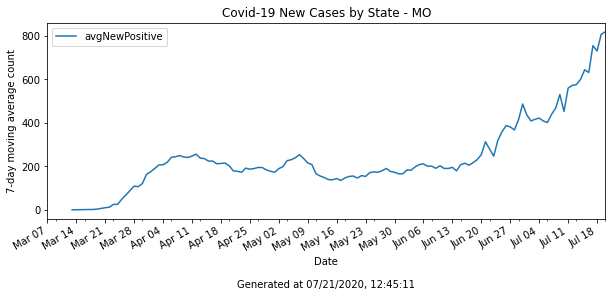

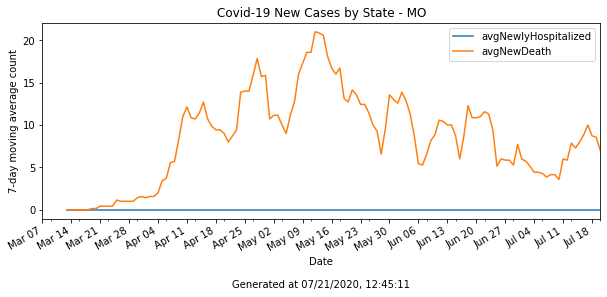

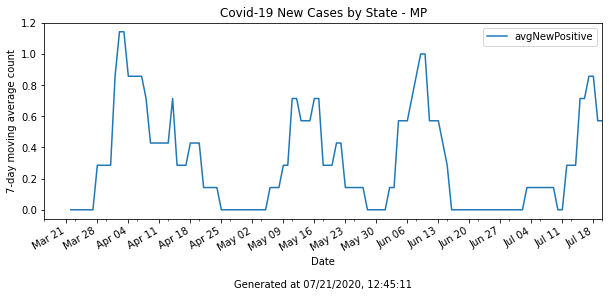

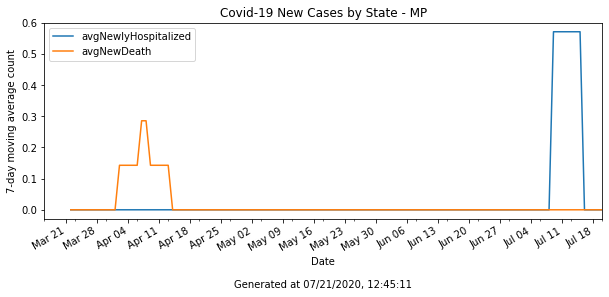

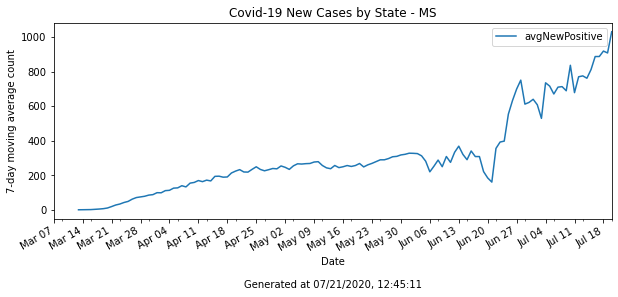

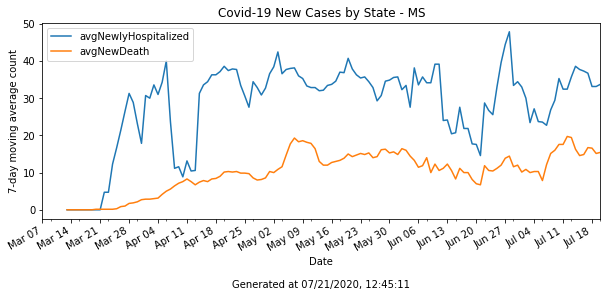

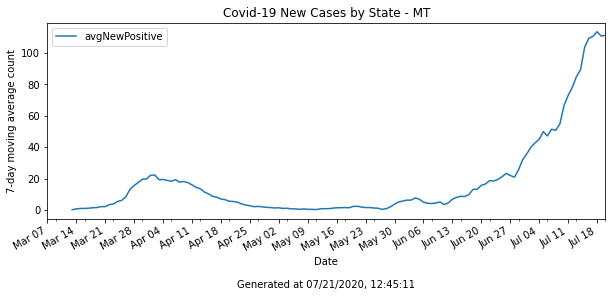

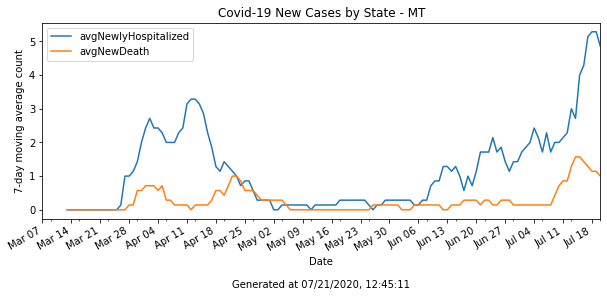

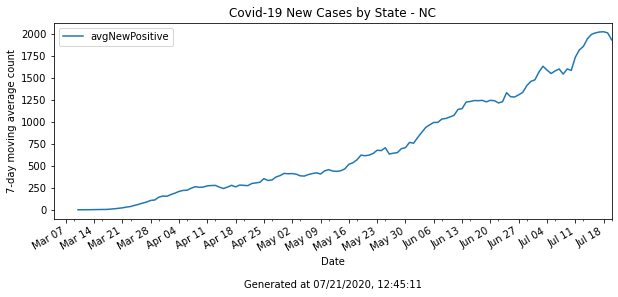

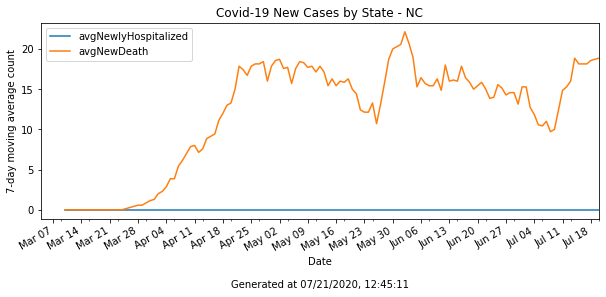

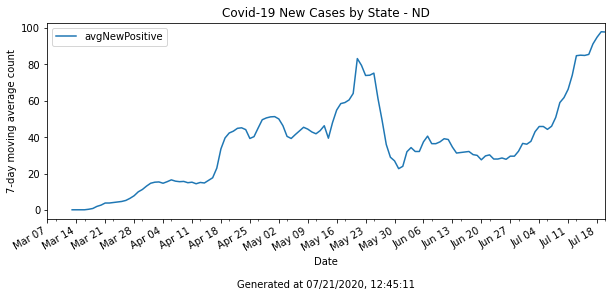

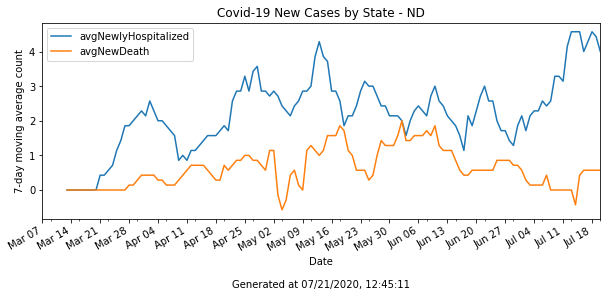

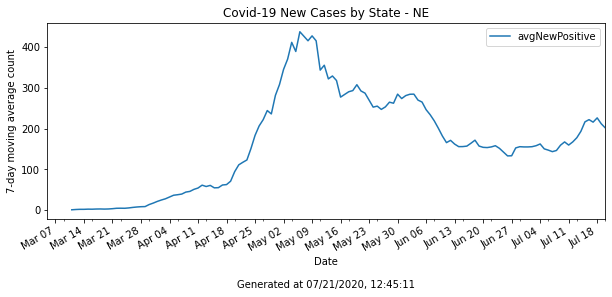

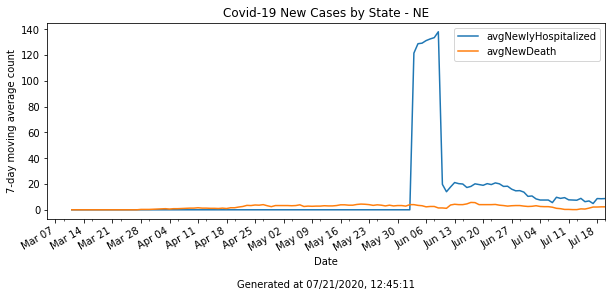

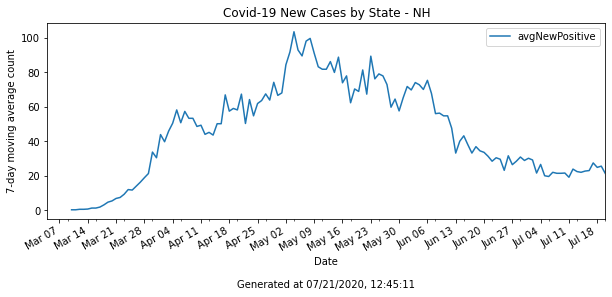

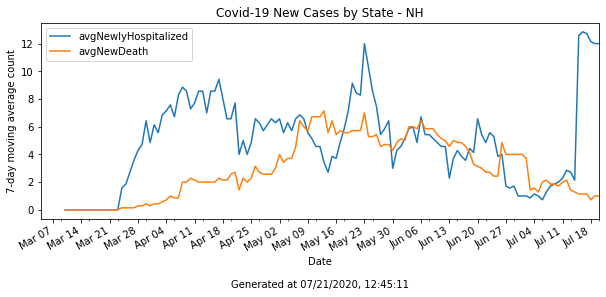

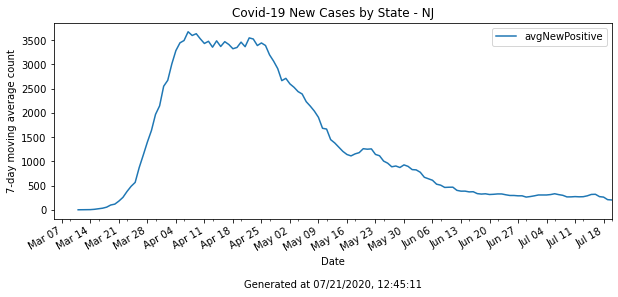

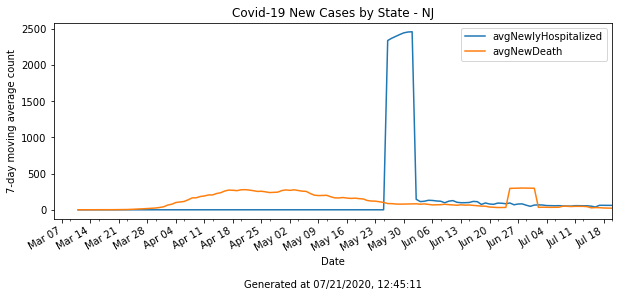

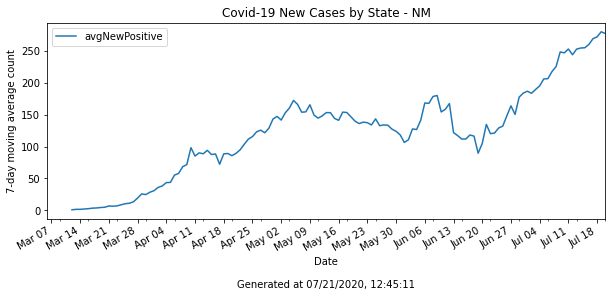

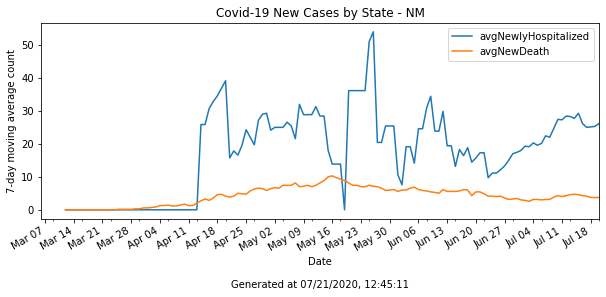

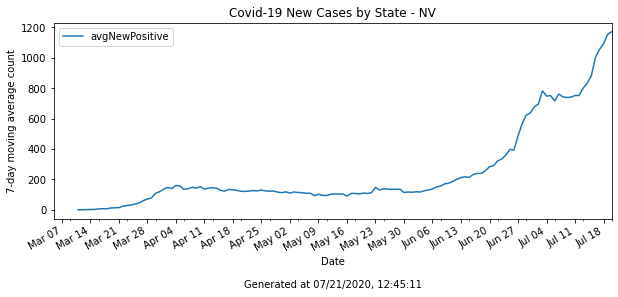

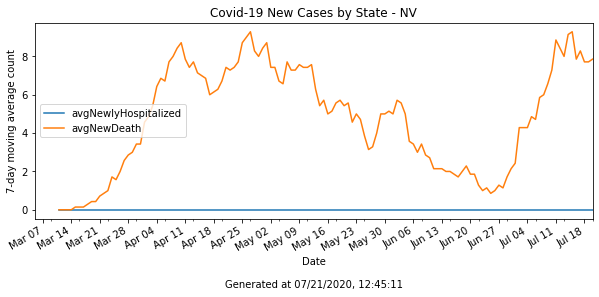

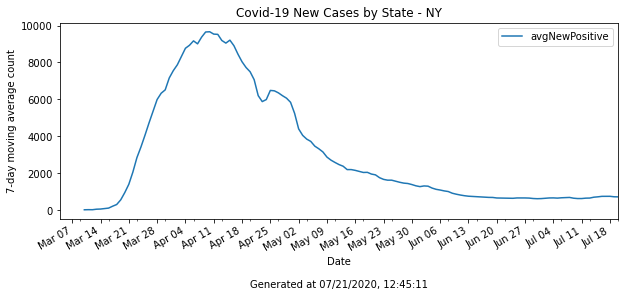

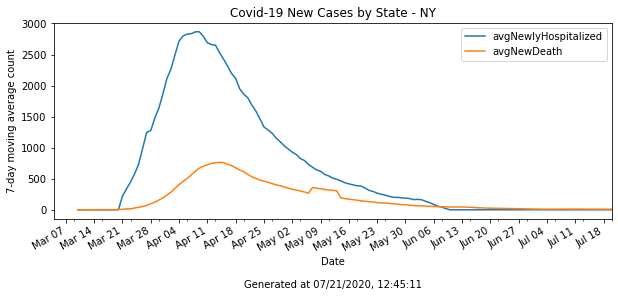

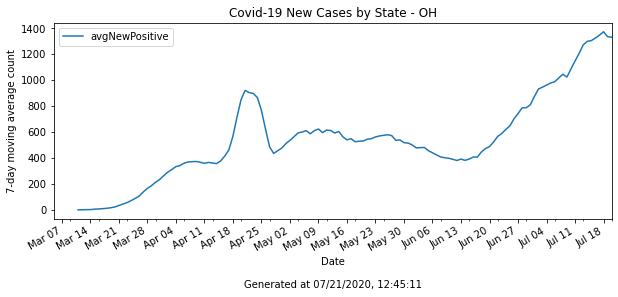

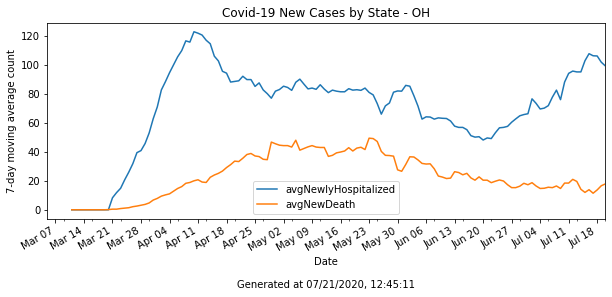

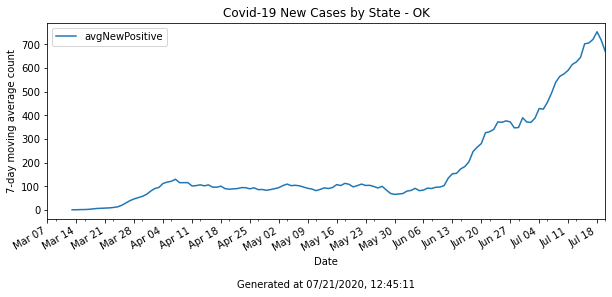

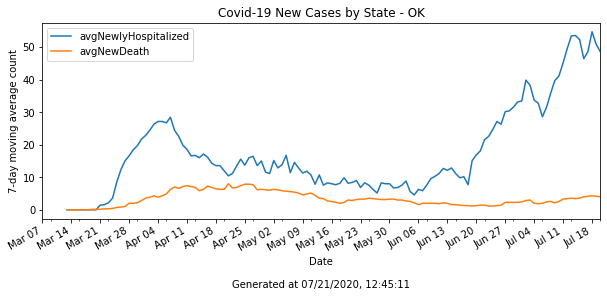

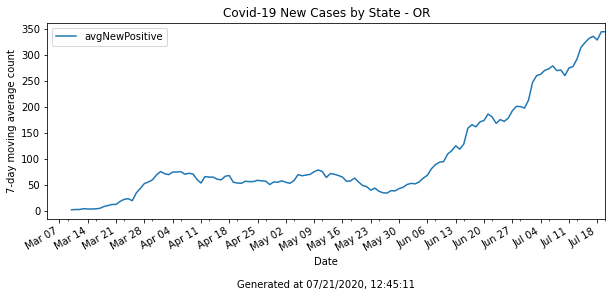

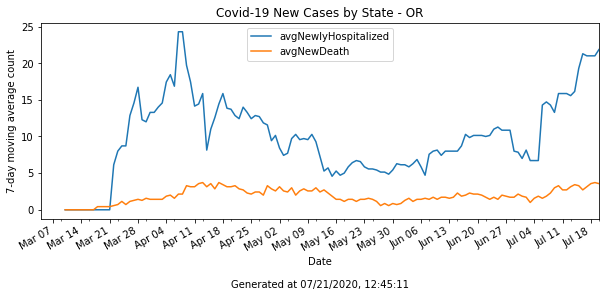

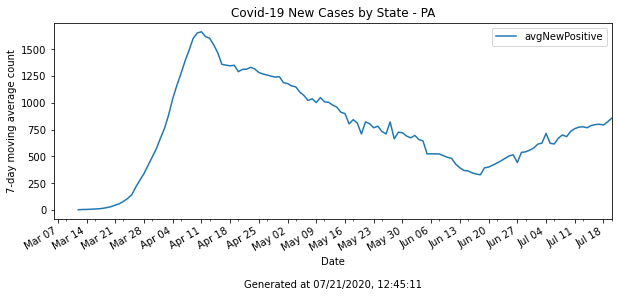

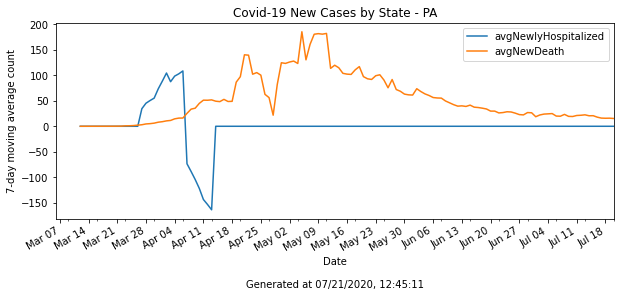

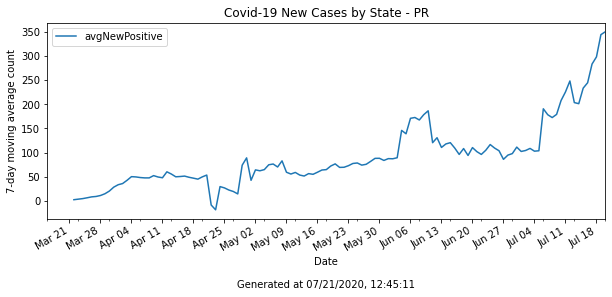

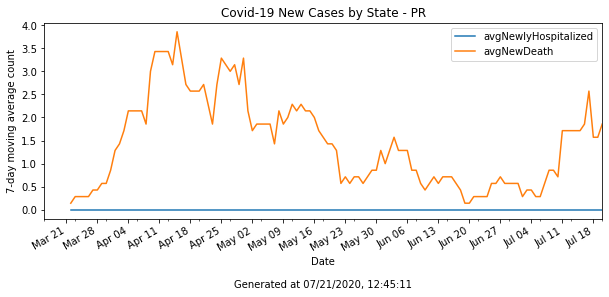

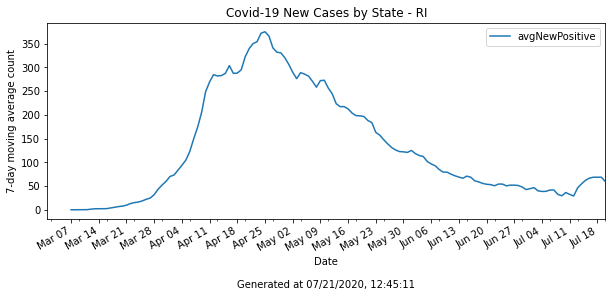

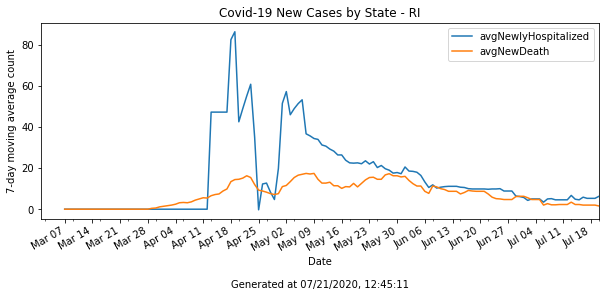

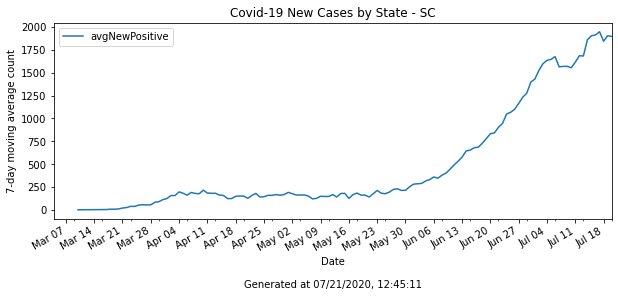

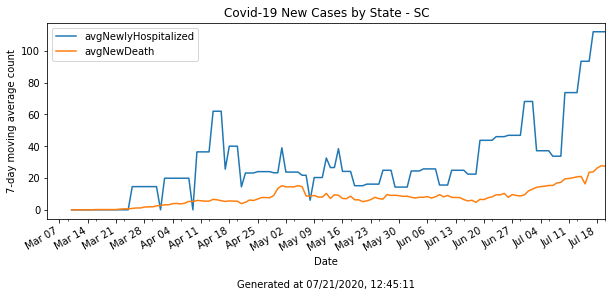

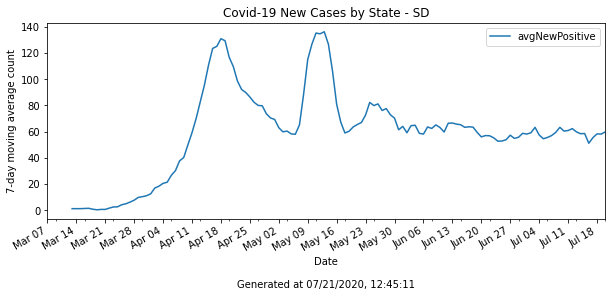

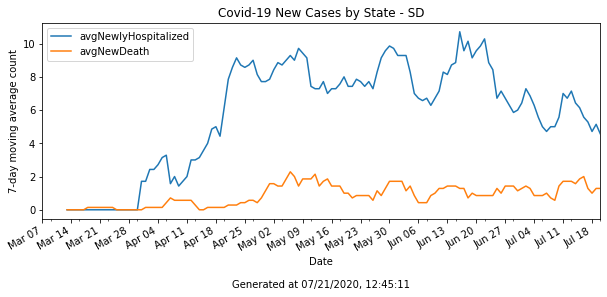

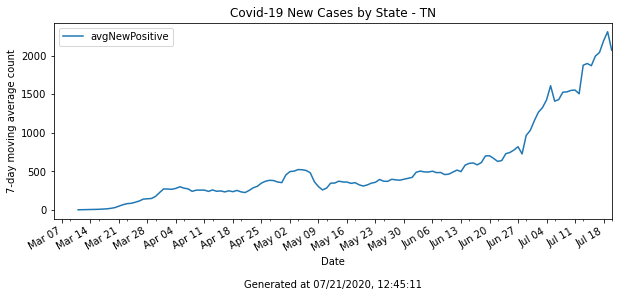

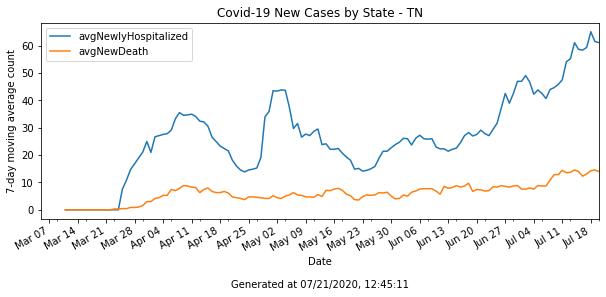

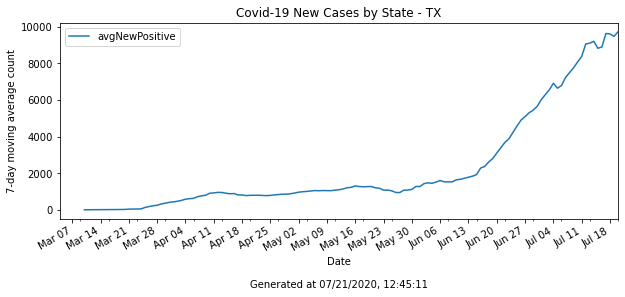

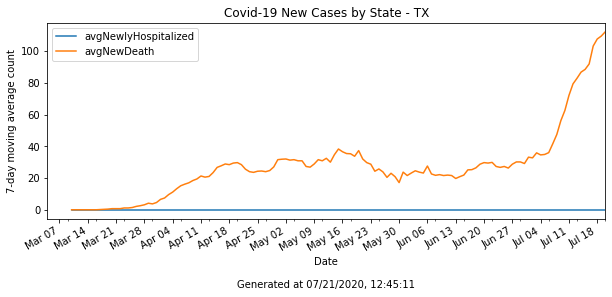

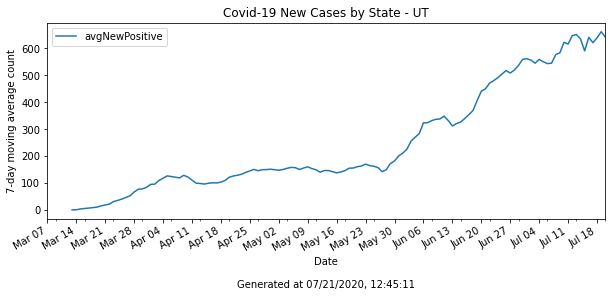

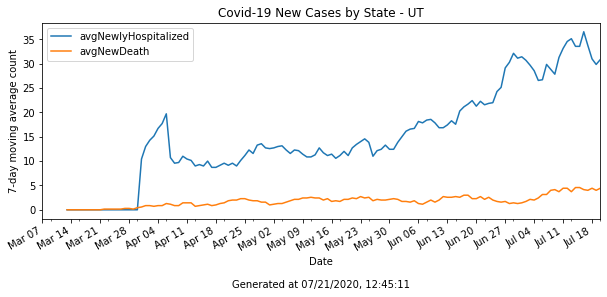

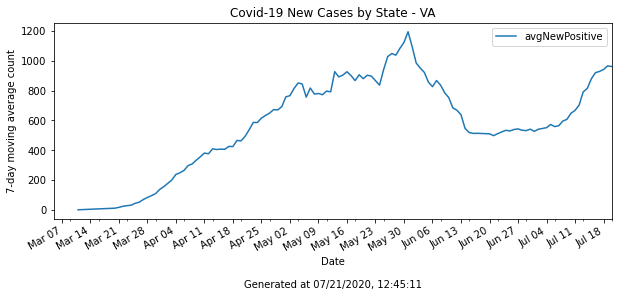

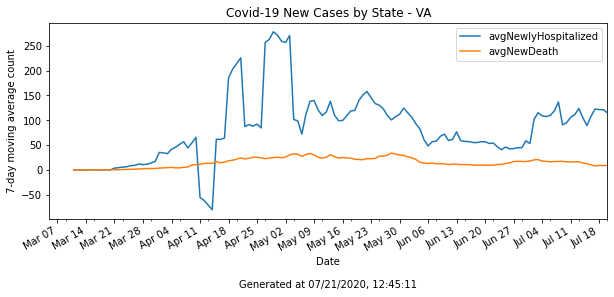

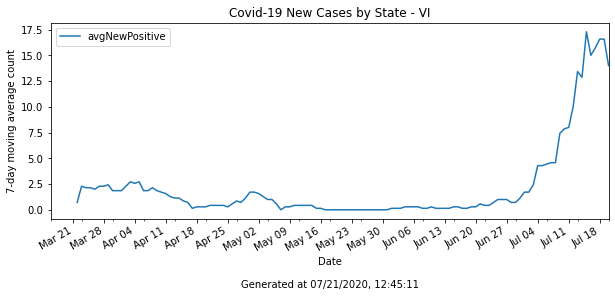

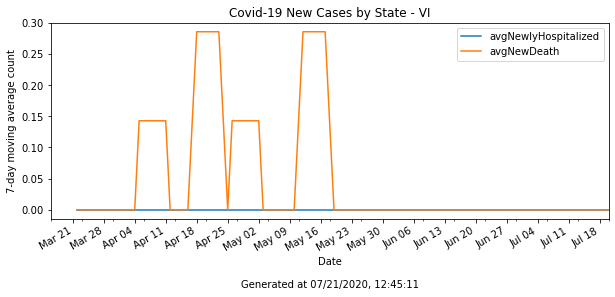

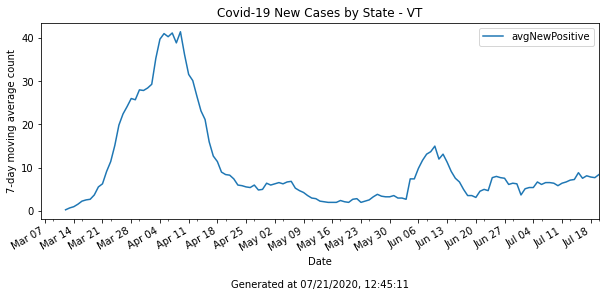

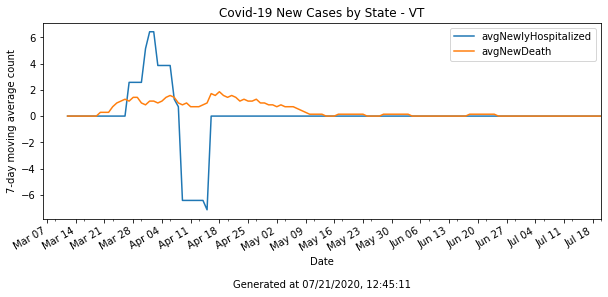

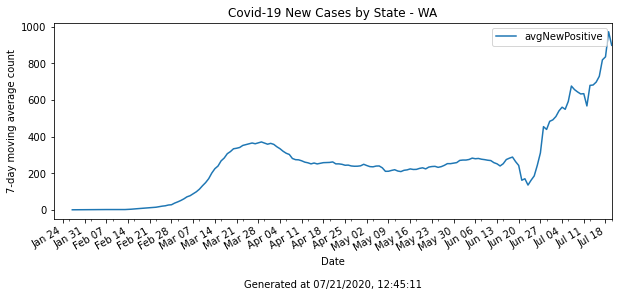

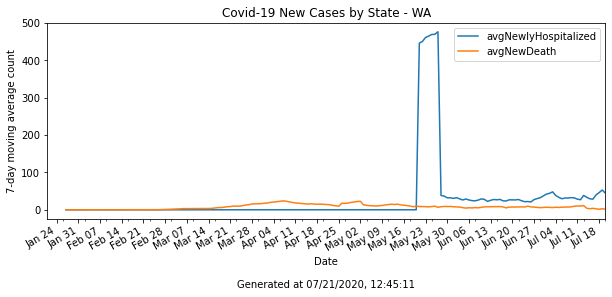

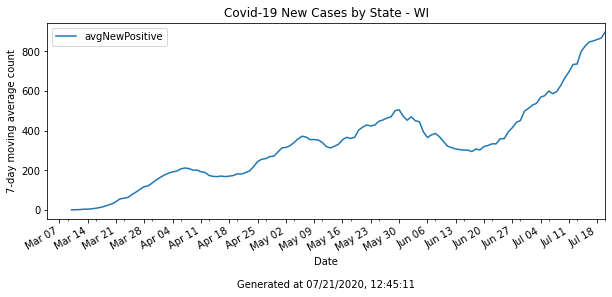

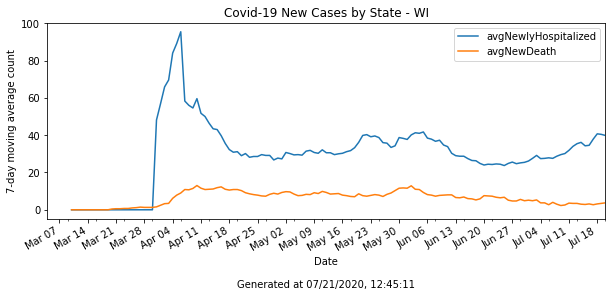

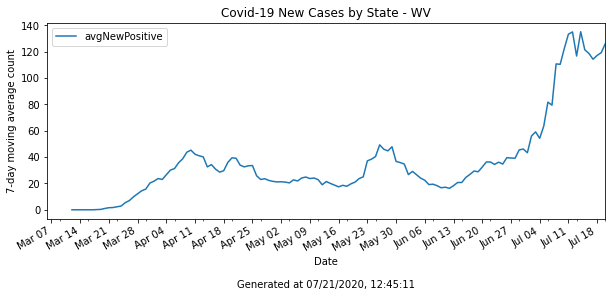

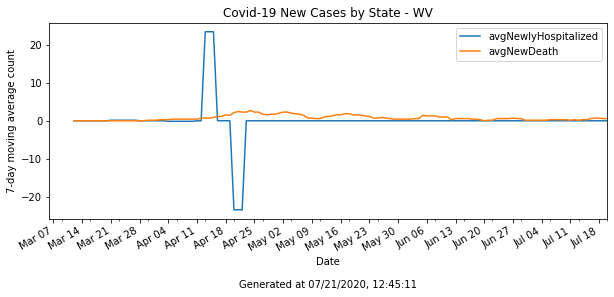

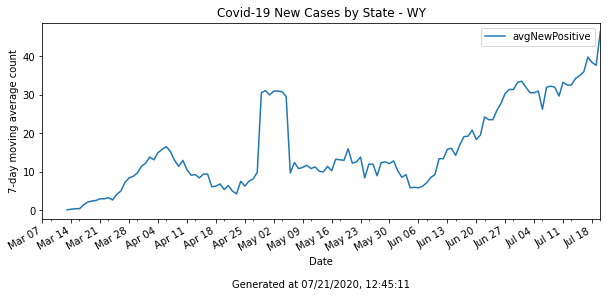

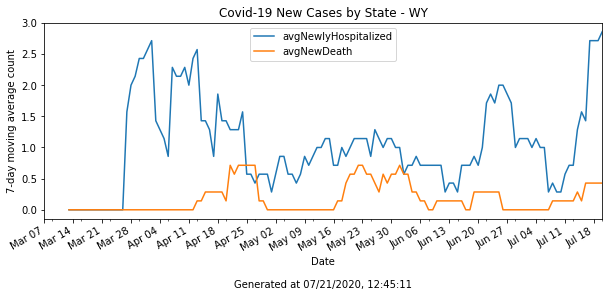

In [48]:
# This python program read daily covid data from website 
# States sometime missed to report covid data on certain dates
# The program uses moving average to address this issue
# Author:   John Zhao <johnzzhao@gmail.com>
# Created:  Monday July 20 09:07:24 2020-0500
#
# ID: covid_daily_report_by_state.py  $
 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# get current datetime string
datetime_str = datetime.now().strftime("%m/%d/%Y, %H:%M:%S")
 
# Covid-19 daily data for all states from the Covid Tracking Project
url = "https://covidtracking.com//api/v1/states/daily.csv"
data = pd.read_csv(url, sep=",")
state_data = data[['date', 'state', 'hospitalizedIncrease',
                   'deathIncrease', 'positiveIncrease']].copy()
state_data['date'] = pd.to_datetime(state_data['date'], format='%Y%m%d')
state_data = state_data.sort_values('state', ascending=True)
# get the list of states reported
state_list = state_data.state.unique()
 
# go over all states to generate line plots
plt.rcParams.update({'figure.max_open_warning': 0})
 
for name in state_list:
    cur_state_data = state_data.loc[state_data['state'] == name, :].copy()
    cur_state_data = cur_state_data.sort_values('date', ascending=True)
 
    # calculate weekly moving average
    cur_state_data['avgNewPositive'] = cur_state_data.iloc[:,4].rolling(window=7).mean()
    cur_state_data['avgNewlyHospitalized'] = cur_state_data.iloc[:, 2].rolling(window=7).mean()
    cur_state_data['avgNewDeath'] = cur_state_data.iloc[:,3].rolling(window=7).mean()
    cur_state_data = cur_state_data.set_index('date')
 
    # set report title and lables
    plot_title = "Covid-19 New Cases by State - " + name
    xlabel_str = "Date\n\n" + "Generated at " + datetime_str
    ylabel_str = "7-day moving average count"
    
    # generate line for new covid-19 case
    report_data = cur_state_data[["avgNewPositive"]]
    fig, ax = plt.subplots(figsize=(10,4))
    report_data.plot(ax=ax, title = plot_title)
    ax.set_xlabel(xlabel_str)
    ax.set_ylabel(ylabel_str)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    fig.autofmt_xdate()
    plt.show()
 
    report_data = cur_state_data[["avgNewlyHospitalized", "avgNewDeath"]]
    fig, ax = plt.subplots(figsize=(10,4))
    report_data.plot(ax=ax, title = plot_title)
    ax.set_xlabel(xlabel_str)
    ax.set_ylabel(ylabel_str)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    fig.autofmt_xdate()
    plt.show()